

# Freelance Platform Project - Classification



![Project](Classification_image.png)

### imorting Libraries : 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from scipy.stats import skew
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

### importing dataset :

In [2]:
df = pd.read_csv("D:\Dk\Data sets\Freelance Platform Projects.csv")

### Top 5 rows:

In [3]:
df.head()

,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Location,Freelancer Preferred From,Type,Date Posted,Description,Duration,Client Registration Date,Client City,Client Country,Client Currency,Client Job Title
0,Banner images for web desgin websites,Design,Entry ($),Graphic Design,EUR,60,remote,ALL,fixed_price,4/29/2023 18:06,We are looking to improve the banner images on...,NaN,11/3/2010,Dublin,Ireland,EUR,PPC Management
1,Make my picture a solid silhouette,"Video, Photo & Image",Entry ($),Image Editing,GBP,20,remote,ALL,fixed_price,4/29/2023 17:40,Hello \n\nI need a quick designer to make 4 pi...,NaN,2/21/2017,London,United Kingdom,GBP,Office manager
2,Bookkeeper needed,Business,Entry ($),Finance & Accounting,GBP,12,remote,ALL,fixed_price,4/29/2023 17:40,Hi - I need a bookkeeper to assist with bookke...,NaN,4/9/2023,London,United Kingdom,GBP,Paralegal
3,Accountant needed,Business,Entry ($),Tax Consulting & Advising,GBP,14,remote,ALL,fixed_price,4/29/2023 17:32,Hi - I need an accountant to assist me with un...,NaN,4/9/2023,London,United Kingdom,GBP,Paralegal
4,Guest Post on High DA Website,Digital Marketing,Expert ($$$),SEO,USD,10000,remote,ALL,fixed_price,4/29/2023 17:09,"Hi, I am currently running a project where I w...",NaN,7/1/2016,Mumbai,India,USD,Guest posts buyer


### Showing Statistical Data :

In [4]:
df.describe()

,Budget
count,12222.000000
mean,229.221486
std,1894.327521
min,0.000000
25%,30.000000
50%,80.000000
75%,150.000000
max,99999.000000


### Number of rows and columns :

In [5]:
df.shape

(12222, 17)

### Datatype :

In [6]:
df.dtypes

Title                        object
Category Name                object
Experience                   object
Sub Category Name            object
Currency                     object
Budget                        int64
Location                     object
Freelancer Preferred From    object
Type                         object
Date Posted                  object
Description                  object
Duration                     object
Client Registration Date     object
Client City                  object
Client Country               object
Client Currency              object
Client Job Title             object
dtype: object

### Showing Unique Values from specific columns:

In [7]:
df['Title'].nunique()

11585

In [8]:
df['Title'].unique()

array(['Banner images for web desgin websites',
       'Make my picture a solid silhouette ', 'Bookkeeper needed', ...,
       'Shopify - Filtering Work (Product Selection/Non-Selection)',
       'Create a Carbon, Water, Waste Calculating platform - Urjent',
       'COMPANY REGISTERS'], dtype=object)

In [9]:
df['Client Job Title'].nunique()

1954

In [10]:
df['Location'].unique()

array(['remote', 'onsite', 'remote_country'], dtype=object)

### Null values :

In [11]:
df.isna().sum()

Title                            0
Category Name                    0
Experience                       0
Sub Category Name                0
Currency                         0
Budget                           0
Location                         0
Freelancer Preferred From        0
Type                             0
Date Posted                      0
Description                      0
Duration                     10620
Client Registration Date         0
Client City                      0
Client Country                   0
Client Currency                  0
Client Job Title              7634
dtype: int64

### Visualizing Null Values by Heatmap:

<Axes: >

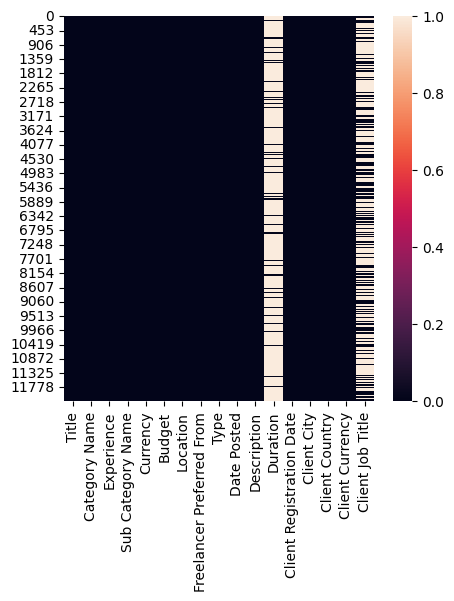

In [12]:
plt.figure(figsize=(5,5))
sns.heatmap(df.isnull())

### Null values in Percentage:

In [13]:
null_val = df.isna().sum()

In [14]:
null_val

Title                            0
Category Name                    0
Experience                       0
Sub Category Name                0
Currency                         0
Budget                           0
Location                         0
Freelancer Preferred From        0
Type                             0
Date Posted                      0
Description                      0
Duration                     10620
Client Registration Date         0
Client City                      0
Client Country                   0
Client Currency                  0
Client Job Title              7634
dtype: int64

In [15]:
no_of_rows = df.shape[0]
no_of_rows

12222

In [16]:
null_val_in_percentage = null_val / no_of_rows * 100

In [17]:
null_val_in_percentage

Title                         0.000000
Category Name                 0.000000
Experience                    0.000000
Sub Category Name             0.000000
Currency                      0.000000
Budget                        0.000000
Location                      0.000000
Freelancer Preferred From     0.000000
Type                          0.000000
Date Posted                   0.000000
Description                   0.000000
Duration                     86.892489
Client Registration Date      0.000000
Client City                   0.000000
Client Country                0.000000
Client Currency               0.000000
Client Job Title             62.461136
dtype: float64

### Deleting columns where null values are greater than 50

In [18]:
drop_col = null_val_in_percentage[null_val_in_percentage>50].keys()
drop_col

Index(['Duration', 'Client Job Title'], dtype='object')

In [19]:
df = df.drop(columns=drop_col)

In [20]:
df.head()

,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Location,Freelancer Preferred From,Type,Date Posted,Description,Client Registration Date,Client City,Client Country,Client Currency
0,Banner images for web desgin websites,Design,Entry ($),Graphic Design,EUR,60,remote,ALL,fixed_price,4/29/2023 18:06,We are looking to improve the banner images on...,11/3/2010,Dublin,Ireland,EUR
1,Make my picture a solid silhouette,"Video, Photo & Image",Entry ($),Image Editing,GBP,20,remote,ALL,fixed_price,4/29/2023 17:40,Hello \n\nI need a quick designer to make 4 pi...,2/21/2017,London,United Kingdom,GBP
2,Bookkeeper needed,Business,Entry ($),Finance & Accounting,GBP,12,remote,ALL,fixed_price,4/29/2023 17:40,Hi - I need a bookkeeper to assist with bookke...,4/9/2023,London,United Kingdom,GBP
3,Accountant needed,Business,Entry ($),Tax Consulting & Advising,GBP,14,remote,ALL,fixed_price,4/29/2023 17:32,Hi - I need an accountant to assist me with un...,4/9/2023,London,United Kingdom,GBP
4,Guest Post on High DA Website,Digital Marketing,Expert ($$$),SEO,USD,10000,remote,ALL,fixed_price,4/29/2023 17:09,"Hi, I am currently running a project where I w...",7/1/2016,Mumbai,India,USD


### Now , showing there are no any null values:

In [21]:
df.isna().sum()

Title                        0
Category Name                0
Experience                   0
Sub Category Name            0
Currency                     0
Budget                       0
Location                     0
Freelancer Preferred From    0
Type                         0
Date Posted                  0
Description                  0
Client Registration Date     0
Client City                  0
Client Country               0
Client Currency              0
dtype: int64

### Number of rows and columns after deletion:

In [22]:
df.shape

(12222, 15)

### Number of Unique values in Specific column:

In [23]:
df['Experience'].nunique()

3

### Replacing Value of 'Experience' Column:

In [24]:
df['Experience'] = df['Experience'].replace({'Entry ($)':0, 'Intermediate ($$)': 1,'Expert ($$$)': 2})

In [25]:
df.head()

,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Location,Freelancer Preferred From,Type,Date Posted,Description,Client Registration Date,Client City,Client Country,Client Currency
0,Banner images for web desgin websites,Design,0,Graphic Design,EUR,60,remote,ALL,fixed_price,4/29/2023 18:06,We are looking to improve the banner images on...,11/3/2010,Dublin,Ireland,EUR
1,Make my picture a solid silhouette,"Video, Photo & Image",0,Image Editing,GBP,20,remote,ALL,fixed_price,4/29/2023 17:40,Hello \n\nI need a quick designer to make 4 pi...,2/21/2017,London,United Kingdom,GBP
2,Bookkeeper needed,Business,0,Finance & Accounting,GBP,12,remote,ALL,fixed_price,4/29/2023 17:40,Hi - I need a bookkeeper to assist with bookke...,4/9/2023,London,United Kingdom,GBP
3,Accountant needed,Business,0,Tax Consulting & Advising,GBP,14,remote,ALL,fixed_price,4/29/2023 17:32,Hi - I need an accountant to assist me with un...,4/9/2023,London,United Kingdom,GBP
4,Guest Post on High DA Website,Digital Marketing,2,SEO,USD,10000,remote,ALL,fixed_price,4/29/2023 17:09,"Hi, I am currently running a project where I w...",7/1/2016,Mumbai,India,USD


### Converting Client currency Values with 'USD' :

In [26]:
df['Currency'].unique()

array(['EUR', 'GBP', 'USD'], dtype=object)

In [27]:
df['Currency'].unique()

array(['EUR', 'GBP', 'USD'], dtype=object)

In [28]:
df['Client Currency'].unique()

array(['EUR', 'GBP', 'USD'], dtype=object)

In [29]:
df['Client Currency'] = df['Client Currency'].replace({'EUR': 1.09565, 'GBP':1.2824, 'USD':1})

In [30]:
df.head()

,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Location,Freelancer Preferred From,Type,Date Posted,Description,Client Registration Date,Client City,Client Country,Client Currency
0,Banner images for web desgin websites,Design,0,Graphic Design,EUR,60,remote,ALL,fixed_price,4/29/2023 18:06,We are looking to improve the banner images on...,11/3/2010,Dublin,Ireland,1.09565
1,Make my picture a solid silhouette,"Video, Photo & Image",0,Image Editing,GBP,20,remote,ALL,fixed_price,4/29/2023 17:40,Hello \n\nI need a quick designer to make 4 pi...,2/21/2017,London,United Kingdom,1.28240
2,Bookkeeper needed,Business,0,Finance & Accounting,GBP,12,remote,ALL,fixed_price,4/29/2023 17:40,Hi - I need a bookkeeper to assist with bookke...,4/9/2023,London,United Kingdom,1.28240
3,Accountant needed,Business,0,Tax Consulting & Advising,GBP,14,remote,ALL,fixed_price,4/29/2023 17:32,Hi - I need an accountant to assist me with un...,4/9/2023,London,United Kingdom,1.28240
4,Guest Post on High DA Website,Digital Marketing,2,SEO,USD,10000,remote,ALL,fixed_price,4/29/2023 17:09,"Hi, I am currently running a project where I w...",7/1/2016,Mumbai,India,1.00000


In [31]:
df['Client Currency'].nunique()

3

### Featuring the Budget Value

In [32]:
def Budget_USD(row):
    if row['Currency'] == 'EUR':
        return row['Budget'] * 1.0956
    elif row['Currency'] == 'GBP':
        return row['Budget'] * 1.28
    else:
        return row['Budget']

In [33]:
df['Budget']=df.apply(Budget_USD,axis = 1)

In [34]:
df.head()

,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Location,Freelancer Preferred From,Type,Date Posted,Description,Client Registration Date,Client City,Client Country,Client Currency
0,Banner images for web desgin websites,Design,0,Graphic Design,EUR,65.736,remote,ALL,fixed_price,4/29/2023 18:06,We are looking to improve the banner images on...,11/3/2010,Dublin,Ireland,1.09565
1,Make my picture a solid silhouette,"Video, Photo & Image",0,Image Editing,GBP,25.600,remote,ALL,fixed_price,4/29/2023 17:40,Hello \n\nI need a quick designer to make 4 pi...,2/21/2017,London,United Kingdom,1.28240
2,Bookkeeper needed,Business,0,Finance & Accounting,GBP,15.360,remote,ALL,fixed_price,4/29/2023 17:40,Hi - I need a bookkeeper to assist with bookke...,4/9/2023,London,United Kingdom,1.28240
3,Accountant needed,Business,0,Tax Consulting & Advising,GBP,17.920,remote,ALL,fixed_price,4/29/2023 17:32,Hi - I need an accountant to assist me with un...,4/9/2023,London,United Kingdom,1.28240
4,Guest Post on High DA Website,Digital Marketing,2,SEO,USD,10000.000,remote,ALL,fixed_price,4/29/2023 17:09,"Hi, I am currently running a project where I w...",7/1/2016,Mumbai,India,1.00000


In [35]:
df['Budget'].dtype

dtype('float64')

### Converting Currency into USD:

In [36]:
df['Currency'] = df['Currency'].replace({'EUR':'USD', 'GBP':'USD'})

In [37]:
df.head()

,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Location,Freelancer Preferred From,Type,Date Posted,Description,Client Registration Date,Client City,Client Country,Client Currency
0,Banner images for web desgin websites,Design,0,Graphic Design,USD,65.736,remote,ALL,fixed_price,4/29/2023 18:06,We are looking to improve the banner images on...,11/3/2010,Dublin,Ireland,1.09565
1,Make my picture a solid silhouette,"Video, Photo & Image",0,Image Editing,USD,25.600,remote,ALL,fixed_price,4/29/2023 17:40,Hello \n\nI need a quick designer to make 4 pi...,2/21/2017,London,United Kingdom,1.28240
2,Bookkeeper needed,Business,0,Finance & Accounting,USD,15.360,remote,ALL,fixed_price,4/29/2023 17:40,Hi - I need a bookkeeper to assist with bookke...,4/9/2023,London,United Kingdom,1.28240
3,Accountant needed,Business,0,Tax Consulting & Advising,USD,17.920,remote,ALL,fixed_price,4/29/2023 17:32,Hi - I need an accountant to assist me with un...,4/9/2023,London,United Kingdom,1.28240
4,Guest Post on High DA Website,Digital Marketing,2,SEO,USD,10000.000,remote,ALL,fixed_price,4/29/2023 17:09,"Hi, I am currently running a project where I w...",7/1/2016,Mumbai,India,1.00000


In [38]:
df['Currency'] = df['Currency'].replace({'USD': 1})

In [39]:
df

,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Location,Freelancer Preferred From,Type,Date Posted,Description,Client Registration Date,Client City,Client Country,Client Currency
0,Banner images for web desgin websites,Design,0,Graphic Design,1,65.736,remote,ALL,fixed_price,4/29/2023 18:06,We are looking to improve the banner images on...,11/3/2010,Dublin,Ireland,1.09565
1,Make my picture a solid silhouette,"Video, Photo & Image",0,Image Editing,1,25.600,remote,ALL,fixed_price,4/29/2023 17:40,Hello \n\nI need a quick designer to make 4 pi...,2/21/2017,London,United Kingdom,1.28240
2,Bookkeeper needed,Business,0,Finance & Accounting,1,15.360,remote,ALL,fixed_price,4/29/2023 17:40,Hi - I need a bookkeeper to assist with bookke...,4/9/2023,London,United Kingdom,1.28240
3,Accountant needed,Business,0,Tax Consulting & Advising,1,17.920,remote,ALL,fixed_price,4/29/2023 17:32,Hi - I need an accountant to assist me with un...,4/9/2023,London,United Kingdom,1.28240
4,Guest Post on High DA Website,Digital Marketing,2,SEO,1,10000.000,remote,ALL,fixed_price,4/29/2023 17:09,"Hi, I am currently running a project where I w...",7/1/2016,Mumbai,India,1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12217,Published Travel Writer required for content c...,Writing & Translation,0,Content Writing,1,64.000,remote,ALL,fixed_price,1/18/2023 19:23,I am looking for a published travel writer to ...,6/6/2011,Amsterdam,Netherlands,1.28240
12218,Shopify - Filtering Work (Product Selection/No...,Design,1,Web Design,1,83.200,remote_country,GB,fixed_price,1/18/2023 19:18,On our website www.juicebitz.co.uk we have add...,3/23/2022,Filey,United Kingdom,1.28240
12219,Simple SQL Query,Technology & Programming,0,Data Science & Analysis,1,64.000,remote,ALL,fixed_price,1/18/2023 19:18,I need someone to write a quick SQL query on a...,3/14/2022,London,United Kingdom,1.28240
12220,"Create a Carbon, Water, Waste Calculating plat...",Design,2,Web Design,1,39.000,remote,ALL,hourly,1/18/2023 19:18,I am seeking a full stack web developer who sp...,7/21/2013,Noida,India,1.00000


### By One hot Encoding, Converting categorical Data into Numberical data :

In [40]:
df['Location'].unique()

array(['remote', 'onsite', 'remote_country'], dtype=object)

In [41]:
column_to_encode=['Location']

In [42]:
df = pd.get_dummies(df,columns=column_to_encode )

In [43]:
df.head()

,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Freelancer Preferred From,Type,Date Posted,Description,Client Registration Date,Client City,Client Country,Client Currency,Location_onsite,Location_remote,Location_remote_country
0,Banner images for web desgin websites,Design,0,Graphic Design,1,65.736,ALL,fixed_price,4/29/2023 18:06,We are looking to improve the banner images on...,11/3/2010,Dublin,Ireland,1.09565,False,True,False
1,Make my picture a solid silhouette,"Video, Photo & Image",0,Image Editing,1,25.600,ALL,fixed_price,4/29/2023 17:40,Hello \n\nI need a quick designer to make 4 pi...,2/21/2017,London,United Kingdom,1.28240,False,True,False
2,Bookkeeper needed,Business,0,Finance & Accounting,1,15.360,ALL,fixed_price,4/29/2023 17:40,Hi - I need a bookkeeper to assist with bookke...,4/9/2023,London,United Kingdom,1.28240,False,True,False
3,Accountant needed,Business,0,Tax Consulting & Advising,1,17.920,ALL,fixed_price,4/29/2023 17:32,Hi - I need an accountant to assist me with un...,4/9/2023,London,United Kingdom,1.28240,False,True,False
4,Guest Post on High DA Website,Digital Marketing,2,SEO,1,10000.000,ALL,fixed_price,4/29/2023 17:09,"Hi, I am currently running a project where I w...",7/1/2016,Mumbai,India,1.00000,False,True,False


In [44]:
df[['Location_onsite','Location_remote','Location_remote_country']]=df[['Location_onsite',
                                                                          'Location_remote',
                                                                          'Location_remote_country']].astype('int32')


In [45]:
df.head()

,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Freelancer Preferred From,Type,Date Posted,Description,Client Registration Date,Client City,Client Country,Client Currency,Location_onsite,Location_remote,Location_remote_country
0,Banner images for web desgin websites,Design,0,Graphic Design,1,65.736,ALL,fixed_price,4/29/2023 18:06,We are looking to improve the banner images on...,11/3/2010,Dublin,Ireland,1.09565,0,1,0
1,Make my picture a solid silhouette,"Video, Photo & Image",0,Image Editing,1,25.600,ALL,fixed_price,4/29/2023 17:40,Hello \n\nI need a quick designer to make 4 pi...,2/21/2017,London,United Kingdom,1.28240,0,1,0
2,Bookkeeper needed,Business,0,Finance & Accounting,1,15.360,ALL,fixed_price,4/29/2023 17:40,Hi - I need a bookkeeper to assist with bookke...,4/9/2023,London,United Kingdom,1.28240,0,1,0
3,Accountant needed,Business,0,Tax Consulting & Advising,1,17.920,ALL,fixed_price,4/29/2023 17:32,Hi - I need an accountant to assist me with un...,4/9/2023,London,United Kingdom,1.28240,0,1,0
4,Guest Post on High DA Website,Digital Marketing,2,SEO,1,10000.000,ALL,fixed_price,4/29/2023 17:09,"Hi, I am currently running a project where I w...",7/1/2016,Mumbai,India,1.00000,0,1,0


In [46]:
df.shape

(12222, 17)

In [47]:
df.dtypes

Title                         object
Category Name                 object
Experience                     int64
Sub Category Name             object
Currency                       int64
Budget                       float64
Freelancer Preferred From     object
Type                          object
Date Posted                   object
Description                   object
Client Registration Date      object
Client City                   object
Client Country                object
Client Currency              float64
Location_onsite                int32
Location_remote                int32
Location_remote_country        int32
dtype: object

### By using Label-Encoding, converting categorical Data into numerical data:

In [48]:
col_to_encode=['Title','Category Name','Sub Category Name','Freelancer Preferred From',
               'Description', 'Client City', 'Client Country','Type']


In [49]:
le = LabelEncoder()
for column in col_to_encode:
    df[column] = le.fit_transform(df[column])

In [50]:
df

,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Freelancer Preferred From,Type,Date Posted,Description,Client Registration Date,Client City,Client Country,Client Currency,Location_onsite,Location_remote,Location_remote_country
0,969,1,0,42,1,65.736,1,0,4/29/2023 18:06,10434,11/3/2010,489,61,1.09565,0,1,0
1,6377,7,0,45,1,25.600,1,0,4/29/2023 17:40,1247,2/21/2017,940,129,1.28240,0,1,0
2,1108,0,0,37,1,15.360,1,0,4/29/2023 17:40,2179,4/9/2023,940,129,1.28240,0,1,0
3,467,0,0,90,1,17.920,1,0,4/29/2023 17:32,2181,4/9/2023,940,129,1.28240,0,1,0
4,3859,2,2,76,1,10000.000,1,0,4/29/2023 17:09,3024,7/1/2016,1079,58,1.00000,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12217,7958,8,0,21,1,64.000,1,0,1/18/2023 19:23,3660,6/6/2011,47,88,1.28240,0,1,0
12218,8803,1,1,101,1,83.200,16,0,1/18/2023 19:18,8718,3/23/2022,554,129,1.28240,0,0,1
12219,8927,6,0,25,1,64.000,1,0,1/18/2023 19:18,6547,3/14/2022,940,129,1.28240,0,1,0
12220,2057,1,2,101,1,39.000,1,1,1/18/2023 19:18,4154,7/21/2013,1135,58,1.00000,0,1,0


In [51]:
df.dtypes

Title                          int32
Category Name                  int32
Experience                     int64
Sub Category Name              int32
Currency                       int64
Budget                       float64
Freelancer Preferred From      int32
Type                           int32
Date Posted                   object
Description                    int32
Client Registration Date      object
Client City                    int32
Client Country                 int32
Client Currency              float64
Location_onsite                int32
Location_remote                int32
Location_remote_country        int32
dtype: object

### Splitting the 'Date Posted' Column into Date, Month, Year, Time

In [52]:
df['Date Posted']

0        4/29/2023 18:06
1        4/29/2023 17:40
2        4/29/2023 17:40
3        4/29/2023 17:32
4        4/29/2023 17:09
              ...       
12217    1/18/2023 19:23
12218    1/18/2023 19:18
12219    1/18/2023 19:18
12220    1/18/2023 19:18
12221    1/18/2023 19:18
Name: Date Posted, Length: 12222, dtype: object

In [53]:
df[['Posted_date','Posted_time']]=df['Date Posted'].str.split(' ',expand=True)

In [54]:
df

,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Freelancer Preferred From,Type,Date Posted,Description,Client Registration Date,Client City,Client Country,Client Currency,Location_onsite,Location_remote,Location_remote_country,Posted_date,Posted_time
0,969,1,0,42,1,65.736,1,0,4/29/2023 18:06,10434,11/3/2010,489,61,1.09565,0,1,0,4/29/2023,18:06
1,6377,7,0,45,1,25.600,1,0,4/29/2023 17:40,1247,2/21/2017,940,129,1.28240,0,1,0,4/29/2023,17:40
2,1108,0,0,37,1,15.360,1,0,4/29/2023 17:40,2179,4/9/2023,940,129,1.28240,0,1,0,4/29/2023,17:40
3,467,0,0,90,1,17.920,1,0,4/29/2023 17:32,2181,4/9/2023,940,129,1.28240,0,1,0,4/29/2023,17:32
4,3859,2,2,76,1,10000.000,1,0,4/29/2023 17:09,3024,7/1/2016,1079,58,1.00000,0,1,0,4/29/2023,17:09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12217,7958,8,0,21,1,64.000,1,0,1/18/2023 19:23,3660,6/6/2011,47,88,1.28240,0,1,0,1/18/2023,19:23
12218,8803,1,1,101,1,83.200,16,0,1/18/2023 19:18,8718,3/23/2022,554,129,1.28240,0,0,1,1/18/2023,19:18
12219,8927,6,0,25,1,64.000,1,0,1/18/2023 19:18,6547,3/14/2022,940,129,1.28240,0,1,0,1/18/2023,19:18
12220,2057,1,2,101,1,39.000,1,1,1/18/2023 19:18,4154,7/21/2013,1135,58,1.00000,0,1,0,1/18/2023,19:18


In [55]:
df[['Posted_month','Posted_Date','Posted_year']]=df['Posted_date'].str.split('/',expand=True)

In [56]:
df[['Posted_month','Posted_Date','Posted_year']]

,Posted_month,Posted_Date,Posted_year
0,4,29,2023
1,4,29,2023
2,4,29,2023
3,4,29,2023
4,4,29,2023
...,...,...,...
12217,1,18,2023
12218,1,18,2023
12219,1,18,2023
12220,1,18,2023


In [57]:
df.head()

,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Freelancer Preferred From,Type,Date Posted,Description,...,Client Country,Client Currency,Location_onsite,Location_remote,Location_remote_country,Posted_date,Posted_time,Posted_month,Posted_Date,Posted_year
0,969,1,0,42,1,65.736,1,0,4/29/2023 18:06,10434,...,61,1.09565,0,1,0,4/29/2023,18:06,4,29,2023
1,6377,7,0,45,1,25.600,1,0,4/29/2023 17:40,1247,...,129,1.28240,0,1,0,4/29/2023,17:40,4,29,2023
2,1108,0,0,37,1,15.360,1,0,4/29/2023 17:40,2179,...,129,1.28240,0,1,0,4/29/2023,17:40,4,29,2023
3,467,0,0,90,1,17.920,1,0,4/29/2023 17:32,2181,...,129,1.28240,0,1,0,4/29/2023,17:32,4,29,2023
4,3859,2,2,76,1,10000.000,1,0,4/29/2023 17:09,3024,...,58,1.00000,0,1,0,4/29/2023,17:09,4,29,2023


In [58]:
df = df.drop(columns=['Date Posted'])

In [59]:
df = df.drop(columns=['Posted_date'])

### Showing the rows and columns after splitting

In [60]:
df.shape

(12222, 20)

In [61]:
df

,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Freelancer Preferred From,Type,Description,Client Registration Date,Client City,Client Country,Client Currency,Location_onsite,Location_remote,Location_remote_country,Posted_time,Posted_month,Posted_Date,Posted_year
0,969,1,0,42,1,65.736,1,0,10434,11/3/2010,489,61,1.09565,0,1,0,18:06,4,29,2023
1,6377,7,0,45,1,25.600,1,0,1247,2/21/2017,940,129,1.28240,0,1,0,17:40,4,29,2023
2,1108,0,0,37,1,15.360,1,0,2179,4/9/2023,940,129,1.28240,0,1,0,17:40,4,29,2023
3,467,0,0,90,1,17.920,1,0,2181,4/9/2023,940,129,1.28240,0,1,0,17:32,4,29,2023
4,3859,2,2,76,1,10000.000,1,0,3024,7/1/2016,1079,58,1.00000,0,1,0,17:09,4,29,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12217,7958,8,0,21,1,64.000,1,0,3660,6/6/2011,47,88,1.28240,0,1,0,19:23,1,18,2023
12218,8803,1,1,101,1,83.200,16,0,8718,3/23/2022,554,129,1.28240,0,0,1,19:18,1,18,2023
12219,8927,6,0,25,1,64.000,1,0,6547,3/14/2022,940,129,1.28240,0,1,0,19:18,1,18,2023
12220,2057,1,2,101,1,39.000,1,1,4154,7/21/2013,1135,58,1.00000,0,1,0,19:18,1,18,2023


In [62]:
df.dtypes

Title                          int32
Category Name                  int32
Experience                     int64
Sub Category Name              int32
Currency                       int64
Budget                       float64
Freelancer Preferred From      int32
Type                           int32
Description                    int32
Client Registration Date      object
Client City                    int32
Client Country                 int32
Client Currency              float64
Location_onsite                int32
Location_remote                int32
Location_remote_country        int32
Posted_time                   object
Posted_month                  object
Posted_Date                   object
Posted_year                   object
dtype: object

### Convtering Datatype into integer:

In [63]:
df[['Posted_month','Posted_Date','Posted_year']]=df[['Posted_month',
                                                     'Posted_Date','Posted_year']].astype('int32')

In [64]:
df.dtypes

Title                          int32
Category Name                  int32
Experience                     int64
Sub Category Name              int32
Currency                       int64
Budget                       float64
Freelancer Preferred From      int32
Type                           int32
Description                    int32
Client Registration Date      object
Client City                    int32
Client Country                 int32
Client Currency              float64
Location_onsite                int32
Location_remote                int32
Location_remote_country        int32
Posted_time                   object
Posted_month                   int32
Posted_Date                    int32
Posted_year                    int32
dtype: object

In [65]:
df[['Client_Month','Client_Date','Client_Year']]=df['Client Registration Date'].str.split('/',expand=True)

In [66]:
df[['Client_Month','Client_Date','Client_Year']]=df[['Client_Month',
                                                     'Client_Date','Client_Year']].astype('int32')

In [67]:
df.dtypes

Title                          int32
Category Name                  int32
Experience                     int64
Sub Category Name              int32
Currency                       int64
Budget                       float64
Freelancer Preferred From      int32
Type                           int32
Description                    int32
Client Registration Date      object
Client City                    int32
Client Country                 int32
Client Currency              float64
Location_onsite                int32
Location_remote                int32
Location_remote_country        int32
Posted_time                   object
Posted_month                   int32
Posted_Date                    int32
Posted_year                    int32
Client_Month                   int32
Client_Date                    int32
Client_Year                    int32
dtype: object

In [68]:
df

,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Freelancer Preferred From,Type,Description,Client Registration Date,...,Location_onsite,Location_remote,Location_remote_country,Posted_time,Posted_month,Posted_Date,Posted_year,Client_Month,Client_Date,Client_Year
0,969,1,0,42,1,65.736,1,0,10434,11/3/2010,...,0,1,0,18:06,4,29,2023,11,3,2010
1,6377,7,0,45,1,25.600,1,0,1247,2/21/2017,...,0,1,0,17:40,4,29,2023,2,21,2017
2,1108,0,0,37,1,15.360,1,0,2179,4/9/2023,...,0,1,0,17:40,4,29,2023,4,9,2023
3,467,0,0,90,1,17.920,1,0,2181,4/9/2023,...,0,1,0,17:32,4,29,2023,4,9,2023
4,3859,2,2,76,1,10000.000,1,0,3024,7/1/2016,...,0,1,0,17:09,4,29,2023,7,1,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12217,7958,8,0,21,1,64.000,1,0,3660,6/6/2011,...,0,1,0,19:23,1,18,2023,6,6,2011
12218,8803,1,1,101,1,83.200,16,0,8718,3/23/2022,...,0,0,1,19:18,1,18,2023,3,23,2022
12219,8927,6,0,25,1,64.000,1,0,6547,3/14/2022,...,0,1,0,19:18,1,18,2023,3,14,2022
12220,2057,1,2,101,1,39.000,1,1,4154,7/21/2013,...,0,1,0,19:18,1,18,2023,7,21,2013


In [69]:
df = df.drop(columns = 'Client Registration Date')

In [70]:
df.shape

(12222, 22)

In [71]:
df.dtypes

Title                          int32
Category Name                  int32
Experience                     int64
Sub Category Name              int32
Currency                       int64
Budget                       float64
Freelancer Preferred From      int32
Type                           int32
Description                    int32
Client City                    int32
Client Country                 int32
Client Currency              float64
Location_onsite                int32
Location_remote                int32
Location_remote_country        int32
Posted_time                   object
Posted_month                   int32
Posted_Date                    int32
Posted_year                    int32
Client_Month                   int32
Client_Date                    int32
Client_Year                    int32
dtype: object

In [72]:
df[['Posted_hour','Posted_Minutes']]=df['Posted_time'].str.split(':',expand=True)

In [73]:
df[['Posted_hour','Posted_Minutes']]

,Posted_hour,Posted_Minutes
0,18,06
1,17,40
2,17,40
3,17,32
4,17,09
...,...,...
12217,19,23
12218,19,18
12219,19,18
12220,19,18


In [74]:
df

,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Freelancer Preferred From,Type,Description,Client City,...,Location_remote_country,Posted_time,Posted_month,Posted_Date,Posted_year,Client_Month,Client_Date,Client_Year,Posted_hour,Posted_Minutes
0,969,1,0,42,1,65.736,1,0,10434,489,...,0,18:06,4,29,2023,11,3,2010,18,06
1,6377,7,0,45,1,25.600,1,0,1247,940,...,0,17:40,4,29,2023,2,21,2017,17,40
2,1108,0,0,37,1,15.360,1,0,2179,940,...,0,17:40,4,29,2023,4,9,2023,17,40
3,467,0,0,90,1,17.920,1,0,2181,940,...,0,17:32,4,29,2023,4,9,2023,17,32
4,3859,2,2,76,1,10000.000,1,0,3024,1079,...,0,17:09,4,29,2023,7,1,2016,17,09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12217,7958,8,0,21,1,64.000,1,0,3660,47,...,0,19:23,1,18,2023,6,6,2011,19,23
12218,8803,1,1,101,1,83.200,16,0,8718,554,...,1,19:18,1,18,2023,3,23,2022,19,18
12219,8927,6,0,25,1,64.000,1,0,6547,940,...,0,19:18,1,18,2023,3,14,2022,19,18
12220,2057,1,2,101,1,39.000,1,1,4154,1135,...,0,19:18,1,18,2023,7,21,2013,19,18


In [75]:
df = df.drop(columns='Posted_time')

In [76]:
df.shape

(12222, 23)

In [77]:
df.head()

,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Freelancer Preferred From,Type,Description,Client City,...,Location_remote,Location_remote_country,Posted_month,Posted_Date,Posted_year,Client_Month,Client_Date,Client_Year,Posted_hour,Posted_Minutes
0,969,1,0,42,1,65.736,1,0,10434,489,...,1,0,4,29,2023,11,3,2010,18,06
1,6377,7,0,45,1,25.600,1,0,1247,940,...,1,0,4,29,2023,2,21,2017,17,40
2,1108,0,0,37,1,15.360,1,0,2179,940,...,1,0,4,29,2023,4,9,2023,17,40
3,467,0,0,90,1,17.920,1,0,2181,940,...,1,0,4,29,2023,4,9,2023,17,32
4,3859,2,2,76,1,10000.000,1,0,3024,1079,...,1,0,4,29,2023,7,1,2016,17,09


In [78]:
df.describe()

,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Freelancer Preferred From,Type,Description,Client City,...,Client Currency,Location_onsite,Location_remote,Location_remote_country,Posted_month,Posted_Date,Posted_year,Client_Month,Client_Date,Client_Year
count,12222.000000,12222.000000,12222.000000,12222.000000,12222.0,12222.000000,12222.000000,12222.000000,12222.000000,12222.000000,...,12222.000000,12222.000000,12222.000000,12222.000000,12222.000000,12222.000000,12222.0,12222.000000,12222.000000,12222.000000
mean,5806.995254,3.712813,1.007282,56.839552,1.0,272.077271,2.186876,0.146048,5958.065538,871.258714,...,1.189543,0.005646,0.935281,0.059074,2.696367,16.161676,2023.0,5.402144,15.564638,2018.803796
std,3340.786272,2.820344,0.936768,32.627551,0.0,2345.979319,5.015981,0.353169,3446.774106,456.183611,...,0.126456,0.074928,0.246040,0.235772,1.003399,8.698321,0.0,3.466704,8.658182,4.002551
min,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2023.0,1.000000,1.000000,2007.000000
25%,2918.250000,1.000000,0.000000,30.000000,1.0,38.400000,1.000000,0.000000,2965.250000,487.250000,...,1.000000,0.000000,1.000000,0.000000,2.000000,9.000000,2023.0,2.000000,8.000000,2016.000000
50%,5842.500000,3.000000,1.000000,52.000000,1.0,96.000000,1.000000,0.000000,5960.500000,940.000000,...,1.282400,0.000000,1.000000,0.000000,3.000000,17.000000,2023.0,4.000000,16.000000,2020.000000
75%,8707.750000,6.000000,2.000000,92.000000,1.0,192.000000,1.000000,0.000000,8938.750000,1139.000000,...,1.282400,0.000000,1.000000,0.000000,4.000000,24.000000,2023.0,9.000000,23.000000,2023.000000
max,11584.000000,8.000000,2.000000,106.000000,1.0,127998.720000,41.000000,1.000000,11924.000000,1807.000000,...,1.282400,1.000000,1.000000,1.000000,4.000000,31.000000,2023.0,12.000000,31.000000,2023.000000


In [79]:
df.dtypes

Title                          int32
Category Name                  int32
Experience                     int64
Sub Category Name              int32
Currency                       int64
Budget                       float64
Freelancer Preferred From      int32
Type                           int32
Description                    int32
Client City                    int32
Client Country                 int32
Client Currency              float64
Location_onsite                int32
Location_remote                int32
Location_remote_country        int32
Posted_month                   int32
Posted_Date                    int32
Posted_year                    int32
Client_Month                   int32
Client_Date                    int32
Client_Year                    int32
Posted_hour                   object
Posted_Minutes                object
dtype: object

In [80]:
df[['Posted_hour','Posted_Minutes']] = df[['Posted_hour','Posted_Minutes']].astype('int32')

In [81]:
df.shape

(12222, 23)

In [82]:
df.dtypes

Title                          int32
Category Name                  int32
Experience                     int64
Sub Category Name              int32
Currency                       int64
Budget                       float64
Freelancer Preferred From      int32
Type                           int32
Description                    int32
Client City                    int32
Client Country                 int32
Client Currency              float64
Location_onsite                int32
Location_remote                int32
Location_remote_country        int32
Posted_month                   int32
Posted_Date                    int32
Posted_year                    int32
Client_Month                   int32
Client_Date                    int32
Client_Year                    int32
Posted_hour                    int32
Posted_Minutes                 int32
dtype: object

### Checking Outliers by creating Boxplot :

<Axes: >

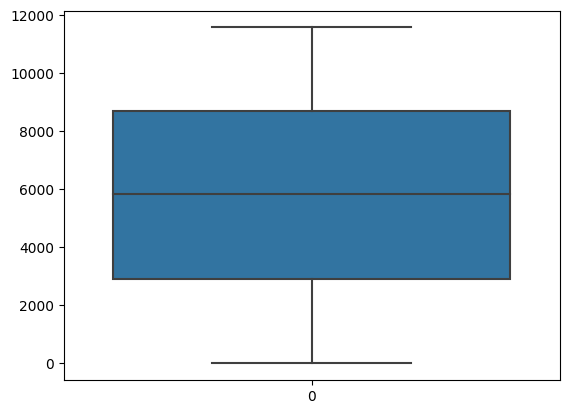

In [83]:
sns.boxplot(df['Title'])

In [84]:
col_num=df[['Title', 'Category Name', 'Experience']]
col_num

,Title,Category Name,Experience
0,969,1,0
1,6377,7,0
2,1108,0,0
3,467,0,0
4,3859,2,2
...,...,...,...
12217,7958,8,0
12218,8803,1,1
12219,8927,6,0
12220,2057,1,2


Axes(0.125,0.653529;0.227941x0.226471)
Axes(0.398529,0.653529;0.227941x0.226471)
Axes(0.672059,0.653529;0.227941x0.226471)


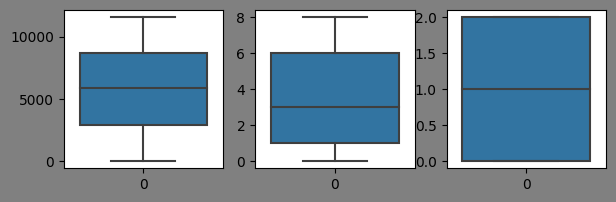

<Figure size 640x480 with 0 Axes>

In [85]:
plt.figure(figsize=(7,7),facecolor='grey', edgecolor='red')
for i,col in enumerate(col_num):
    plt.subplot(3,3,i+1)
    print(sns.boxplot(col_num[col]))
plt.figure()
plt.show()

In [86]:
df.dtypes

Title                          int32
Category Name                  int32
Experience                     int64
Sub Category Name              int32
Currency                       int64
Budget                       float64
Freelancer Preferred From      int32
Type                           int32
Description                    int32
Client City                    int32
Client Country                 int32
Client Currency              float64
Location_onsite                int32
Location_remote                int32
Location_remote_country        int32
Posted_month                   int32
Posted_Date                    int32
Posted_year                    int32
Client_Month                   int32
Client_Date                    int32
Client_Year                    int32
Posted_hour                    int32
Posted_Minutes                 int32
dtype: object

In [87]:
col_num=df[['Title', 'Category Name', 'Experience', 'Sub Category Name',
            'Currency','Freelancer Preferred From', 'Description', 'Client City',
            'Client Country', 'Client Currency', 'Location_onsite','Location_remote',
            'Location_remote_country', 'Posted_year', 'Posted_month', 'Posted_Date',
            'Budget','Client_Year','Client_Month','Client_Date','Posted_hour','Posted_Minutes']]
col_num

,Title,Category Name,Experience,Sub Category Name,Currency,Freelancer Preferred From,Description,Client City,Client Country,Client Currency,...,Location_remote_country,Posted_year,Posted_month,Posted_Date,Budget,Client_Year,Client_Month,Client_Date,Posted_hour,Posted_Minutes
0,969,1,0,42,1,1,10434,489,61,1.09565,...,0,2023,4,29,65.736,2010,11,3,18,6
1,6377,7,0,45,1,1,1247,940,129,1.28240,...,0,2023,4,29,25.600,2017,2,21,17,40
2,1108,0,0,37,1,1,2179,940,129,1.28240,...,0,2023,4,29,15.360,2023,4,9,17,40
3,467,0,0,90,1,1,2181,940,129,1.28240,...,0,2023,4,29,17.920,2023,4,9,17,32
4,3859,2,2,76,1,1,3024,1079,58,1.00000,...,0,2023,4,29,10000.000,2016,7,1,17,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12217,7958,8,0,21,1,1,3660,47,88,1.28240,...,0,2023,1,18,64.000,2011,6,6,19,23
12218,8803,1,1,101,1,16,8718,554,129,1.28240,...,1,2023,1,18,83.200,2022,3,23,19,18
12219,8927,6,0,25,1,1,6547,940,129,1.28240,...,0,2023,1,18,64.000,2022,3,14,19,18
12220,2057,1,2,101,1,1,4154,1135,58,1.00000,...,0,2023,1,18,39.000,2013,7,21,19,18


Axes(0.125,0.747241;0.133621x0.132759)
Axes(0.285345,0.747241;0.133621x0.132759)
Axes(0.44569,0.747241;0.133621x0.132759)
Axes(0.606034,0.747241;0.133621x0.132759)
Axes(0.766379,0.747241;0.133621x0.132759)
Axes(0.125,0.587931;0.133621x0.132759)
Axes(0.285345,0.587931;0.133621x0.132759)
Axes(0.44569,0.587931;0.133621x0.132759)
Axes(0.606034,0.587931;0.133621x0.132759)
Axes(0.766379,0.587931;0.133621x0.132759)
Axes(0.125,0.428621;0.133621x0.132759)
Axes(0.285345,0.428621;0.133621x0.132759)
Axes(0.44569,0.428621;0.133621x0.132759)
Axes(0.606034,0.428621;0.133621x0.132759)
Axes(0.766379,0.428621;0.133621x0.132759)
Axes(0.125,0.26931;0.133621x0.132759)
Axes(0.285345,0.26931;0.133621x0.132759)
Axes(0.44569,0.26931;0.133621x0.132759)
Axes(0.606034,0.26931;0.133621x0.132759)
Axes(0.766379,0.26931;0.133621x0.132759)
Axes(0.125,0.11;0.133621x0.132759)
Axes(0.285345,0.11;0.133621x0.132759)


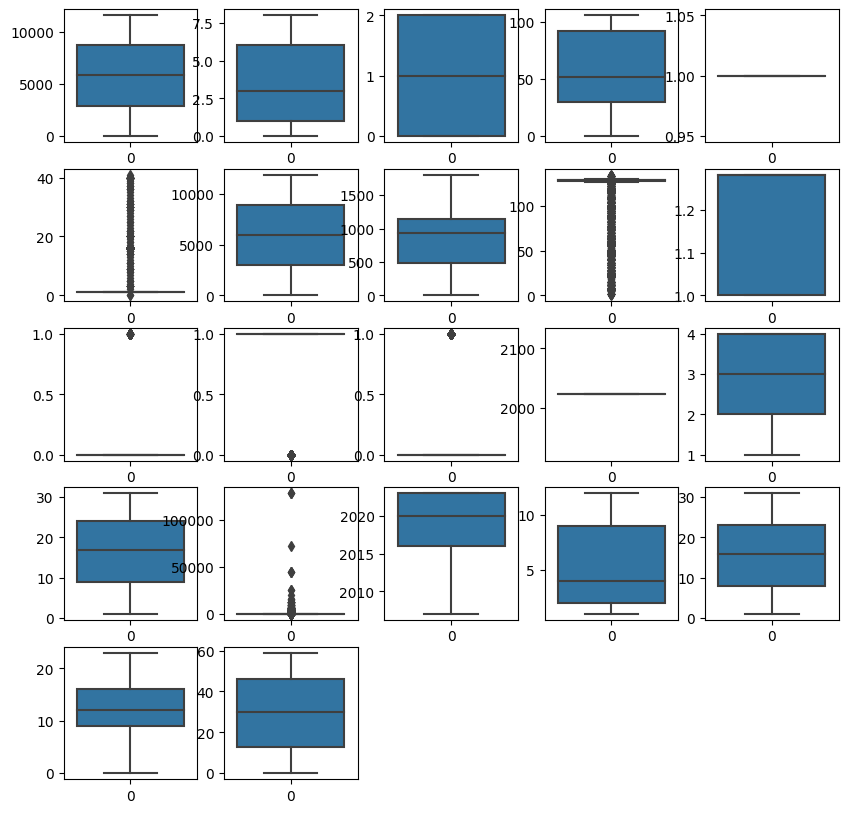

<Figure size 640x480 with 0 Axes>

In [88]:
plt.figure(figsize=(10,10))
for i,col in enumerate(col_num):
    plt.subplot(5,5,i+1)
    print(sns.boxplot(col_num[col]))
plt.figure()
plt.show()

# Visualization Using skewness

Title
-0.009026401415337032
Category Name
0.13667421107983443
Experience
-0.014462463349103371
Sub Category Name
-0.018928584486655
Currency
nan
Freelancer Preferred From
5.042642835420588
Description
-0.0001446030632413126
Client City
0.037911936508722724
Client Country
-1.9572602850079996
Client Currency
-0.6898270113717148
Location_onsite
13.19606427663473
Location_remote
-3.5384354210719717
Location_remote_country
3.740422495926208
Posted_year
nan
Posted_month
-0.14409900661337421
Posted_Date
-0.10148836604122241
Budget
44.18062965631726
Client_Year
-0.6421850192732051
Client_Month
0.48252621987310695
Client_Date
0.027223216495579537
Posted_hour
-0.3848813346979864
Posted_Minutes
-0.01718973566521674


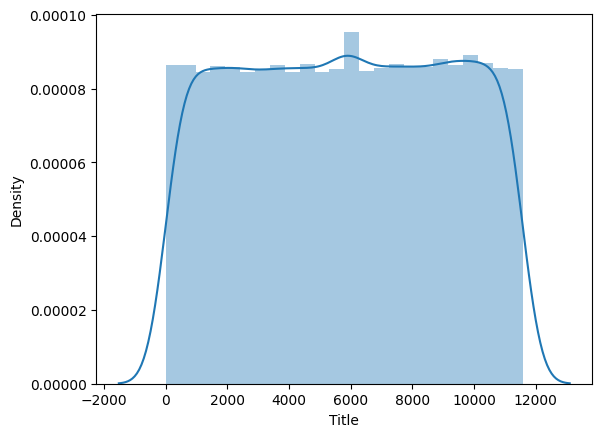

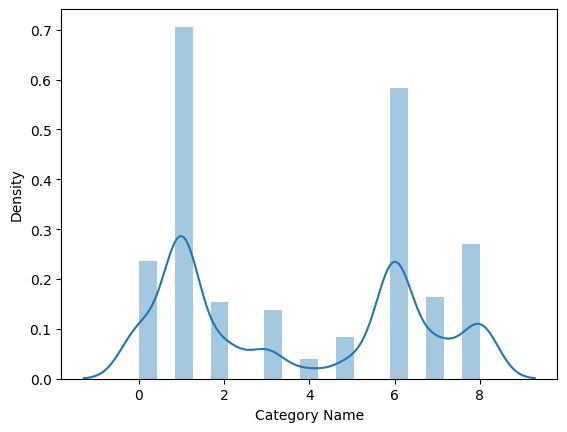

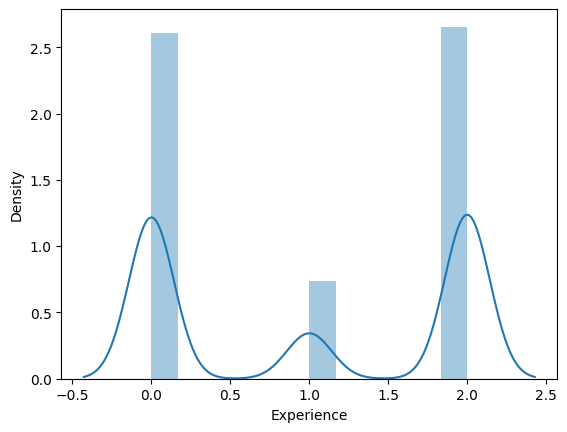

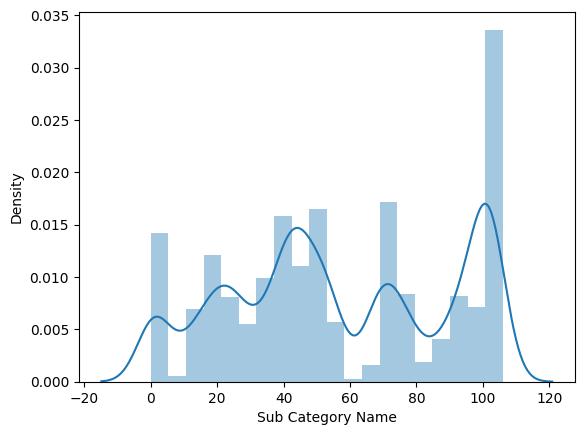

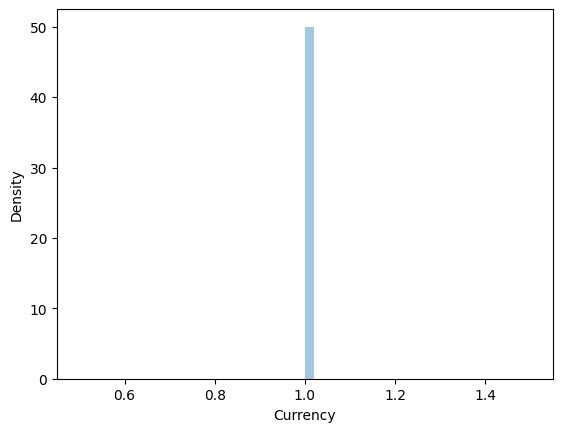

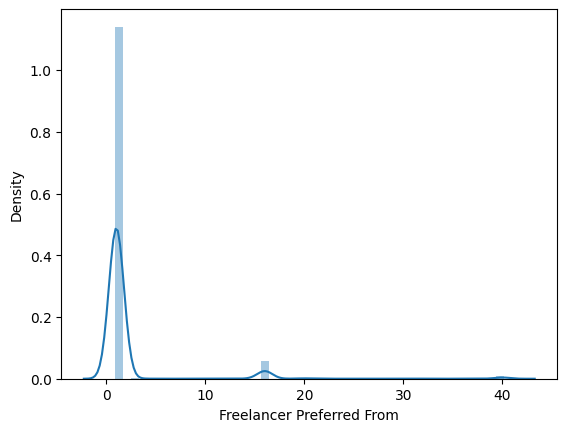

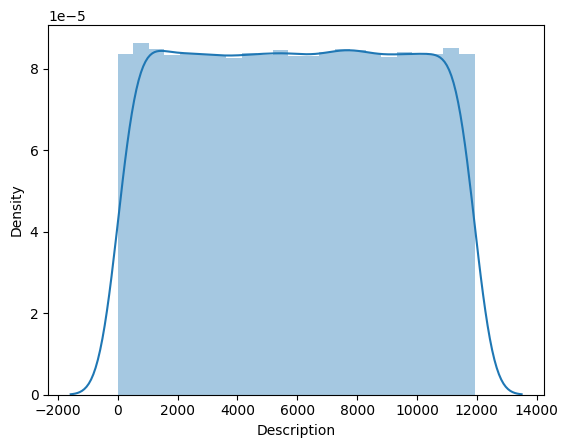

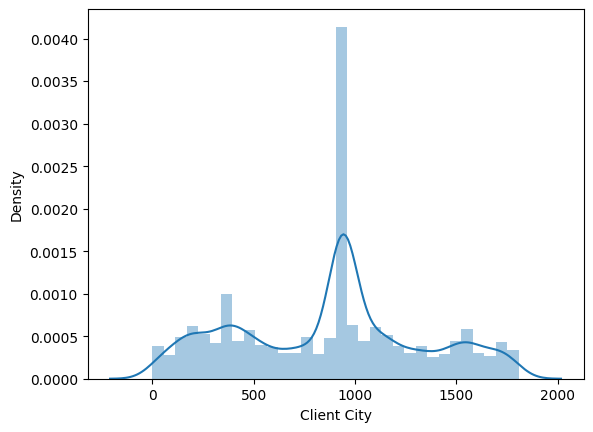

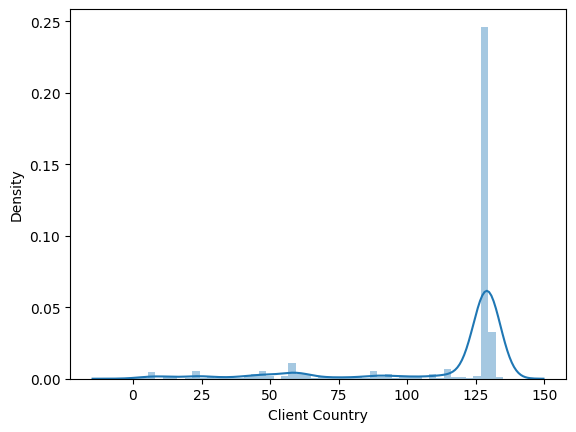

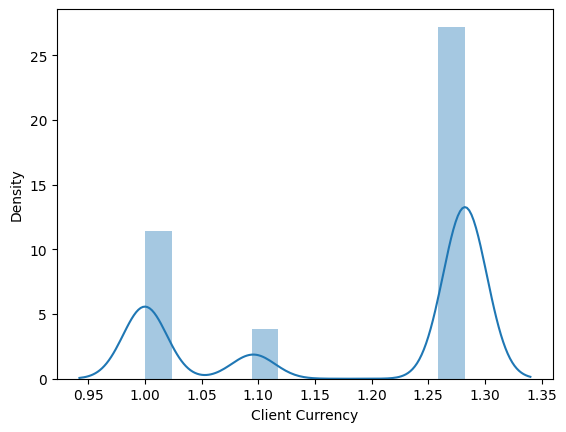

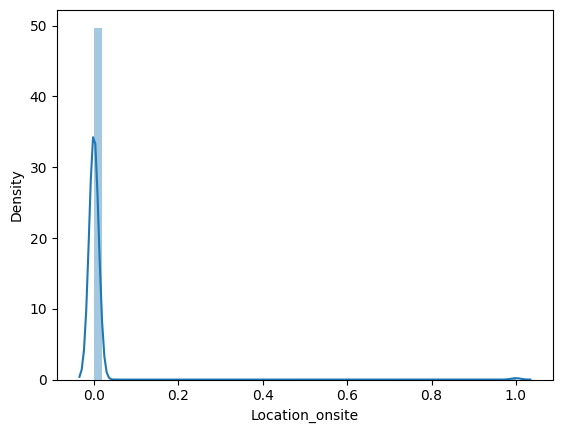

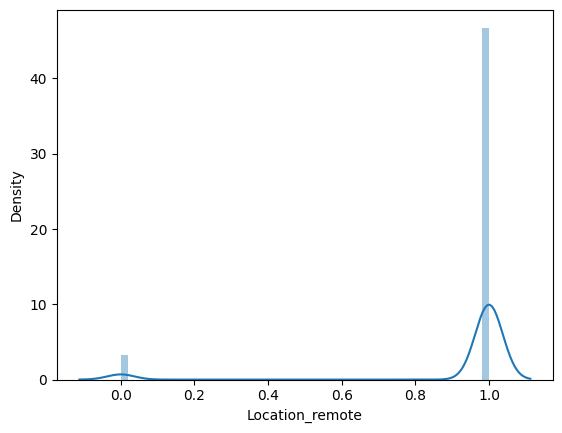

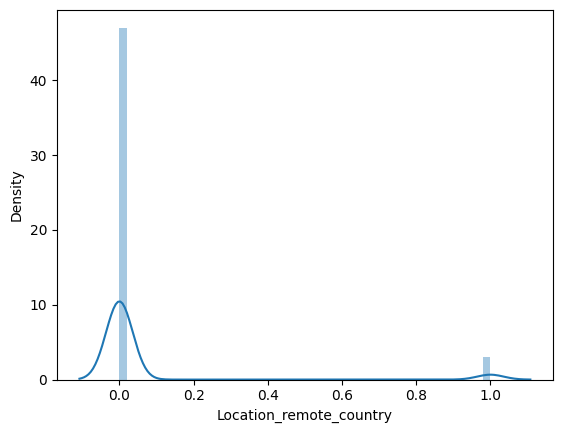

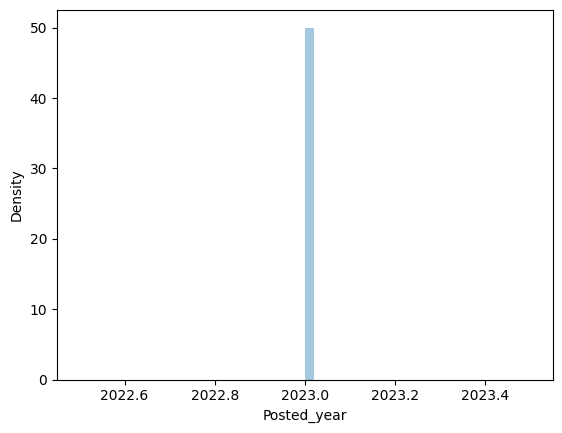

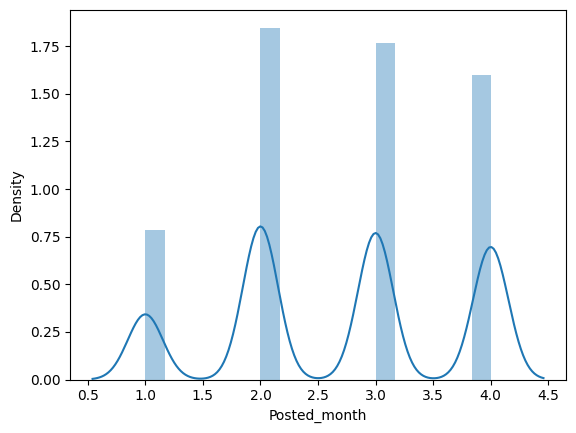

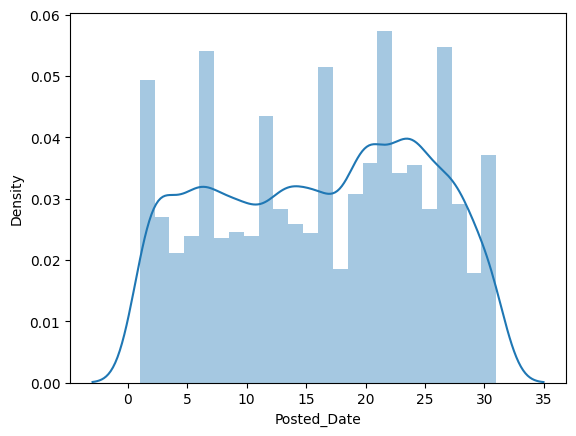

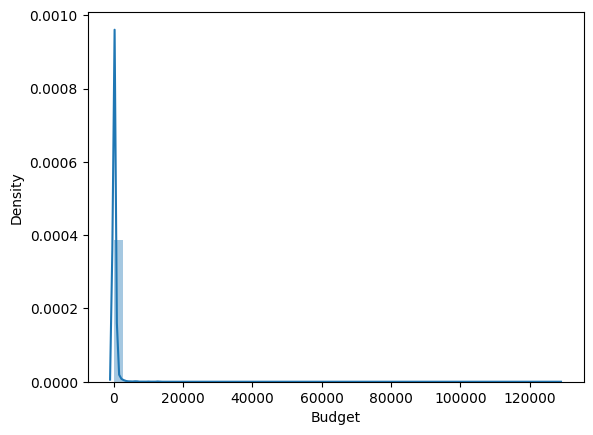

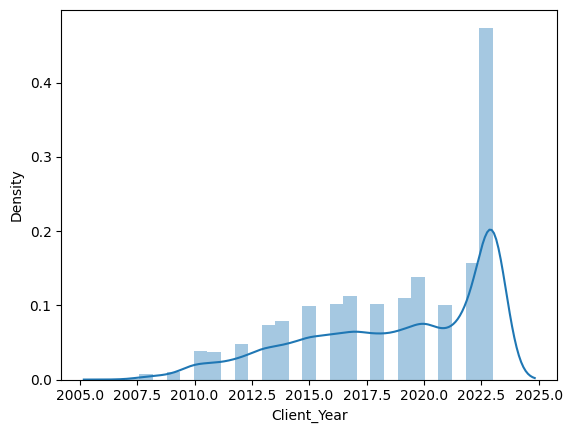

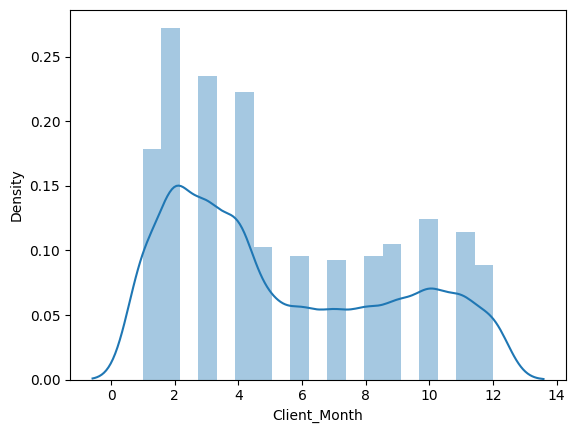

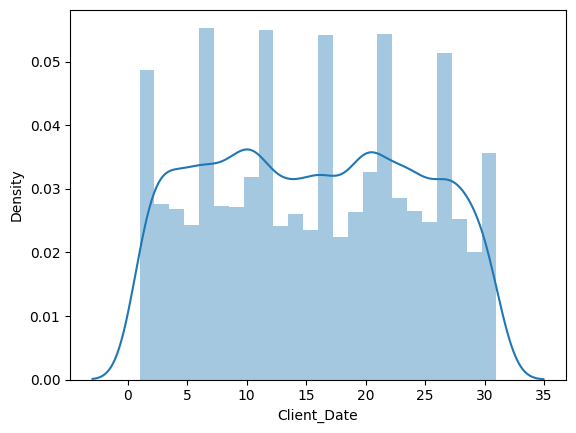

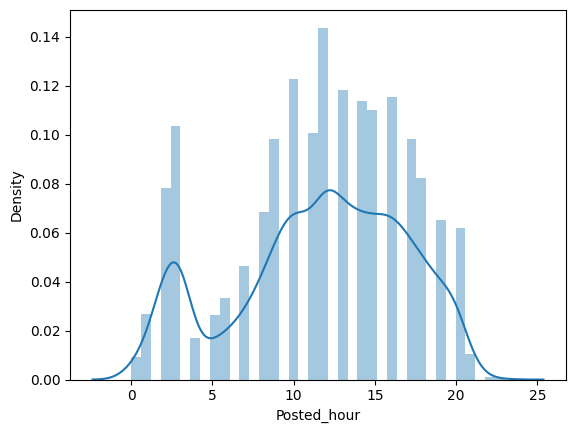

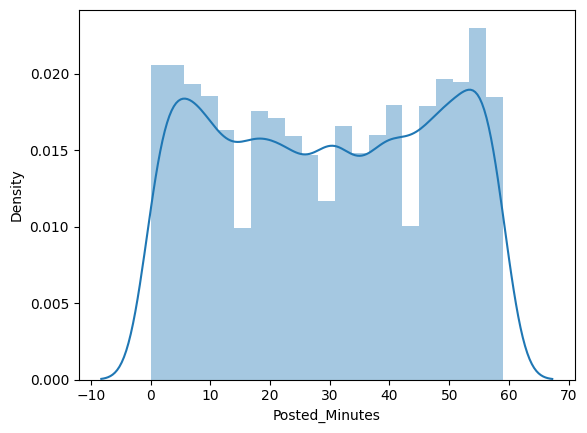

In [89]:
for col in col_num:
    print(col)
    print(skew(col_num[col]))
    
    plt.figure()
    sns.distplot(col_num[col])

### Checking outliers in Client Country

<Axes: >

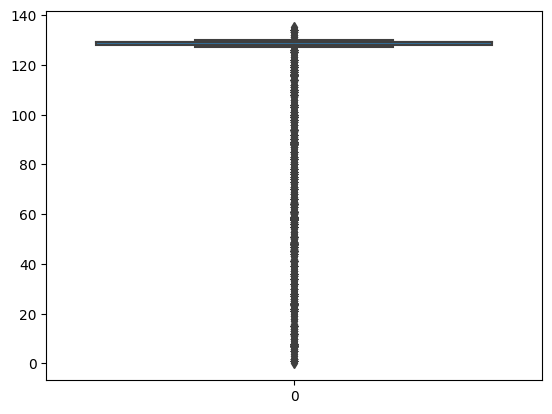

In [90]:

sns.boxplot(df['Client Country'])


### Checking Outliers in Freelancer preferred Form

<Axes: >

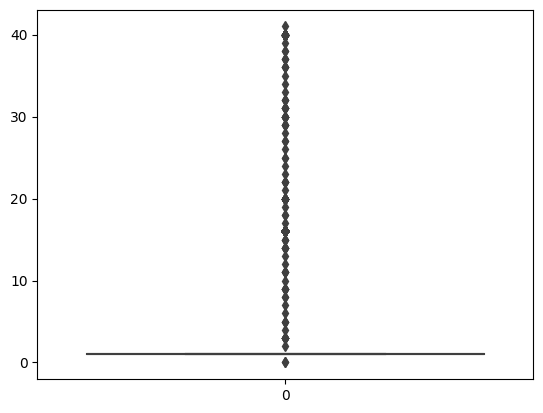

In [91]:
sns.boxplot(df['Freelancer Preferred From'])

In [92]:
df['Freelancer Preferred From'].value_counts()

Freelancer Preferred From
1     11431
16      578
40       90
20       27
3        10
30        9
31        6
14        6
9         6
36        4
11        4
29        4
22        4
5         3
32        3
37        3
15        3
27        2
38        2
25        2
8         2
0         2
18        2
6         1
41        1
13        1
10        1
19        1
35        1
7         1
17        1
2         1
39        1
23        1
34        1
24        1
33        1
4         1
12        1
21        1
26        1
28        1
Name: count, dtype: int64

### Removing Outliers Using IQR method 

In [93]:
Freelancer_Preferred_From=sorted(df['Freelancer Preferred From'])

In [94]:
Freelancer_Preferred_From

[0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [95]:
Q1,Q3 = np.percentile(Freelancer_Preferred_From,[25,75])

In [96]:
Q1,Q3

(1.0, 1.0)

In [97]:
IQR = Q3-Q1 

In [98]:
IQR

0.0

In [99]:
Lowerfence = Q1-(1.5*IQR)
Upperfence = Q3+(1.5*IQR)

In [100]:
print(Lowerfence)
print(Upperfence)

1.0
1.0


In [101]:
df = df[df['Freelancer Preferred From']<=Upperfence]
df

,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Freelancer Preferred From,Type,Description,Client City,...,Location_remote,Location_remote_country,Posted_month,Posted_Date,Posted_year,Client_Month,Client_Date,Client_Year,Posted_hour,Posted_Minutes
0,969,1,0,42,1,65.736,1,0,10434,489,...,1,0,4,29,2023,11,3,2010,18,6
1,6377,7,0,45,1,25.600,1,0,1247,940,...,1,0,4,29,2023,2,21,2017,17,40
2,1108,0,0,37,1,15.360,1,0,2179,940,...,1,0,4,29,2023,4,9,2023,17,40
3,467,0,0,90,1,17.920,1,0,2181,940,...,1,0,4,29,2023,4,9,2023,17,32
4,3859,2,2,76,1,10000.000,1,0,3024,1079,...,1,0,4,29,2023,7,1,2016,17,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12216,8927,6,0,26,1,38.400,1,0,6546,940,...,1,0,1,18,2023,3,14,2022,19,23
12217,7958,8,0,21,1,64.000,1,0,3660,47,...,1,0,1,18,2023,6,6,2011,19,23
12219,8927,6,0,25,1,64.000,1,0,6547,940,...,1,0,1,18,2023,3,14,2022,19,18
12220,2057,1,2,101,1,39.000,1,1,4154,1135,...,1,0,1,18,2023,7,21,2013,19,18


In [102]:
df = df[df['Freelancer Preferred From']>=Upperfence]
df

,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Freelancer Preferred From,Type,Description,Client City,...,Location_remote,Location_remote_country,Posted_month,Posted_Date,Posted_year,Client_Month,Client_Date,Client_Year,Posted_hour,Posted_Minutes
0,969,1,0,42,1,65.736,1,0,10434,489,...,1,0,4,29,2023,11,3,2010,18,6
1,6377,7,0,45,1,25.600,1,0,1247,940,...,1,0,4,29,2023,2,21,2017,17,40
2,1108,0,0,37,1,15.360,1,0,2179,940,...,1,0,4,29,2023,4,9,2023,17,40
3,467,0,0,90,1,17.920,1,0,2181,940,...,1,0,4,29,2023,4,9,2023,17,32
4,3859,2,2,76,1,10000.000,1,0,3024,1079,...,1,0,4,29,2023,7,1,2016,17,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12216,8927,6,0,26,1,38.400,1,0,6546,940,...,1,0,1,18,2023,3,14,2022,19,23
12217,7958,8,0,21,1,64.000,1,0,3660,47,...,1,0,1,18,2023,6,6,2011,19,23
12219,8927,6,0,25,1,64.000,1,0,6547,940,...,1,0,1,18,2023,3,14,2022,19,18
12220,2057,1,2,101,1,39.000,1,1,4154,1135,...,1,0,1,18,2023,7,21,2013,19,18


### Showing Boxplot after removing outliers:

<Axes: >

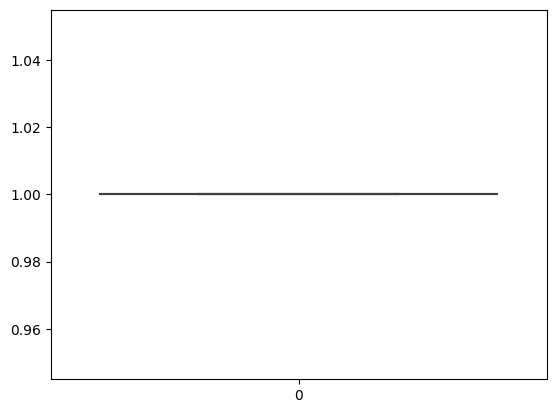

In [103]:
sns.boxplot(df['Freelancer Preferred From'])

### Checking Outlier in Location_on_site

<Axes: >

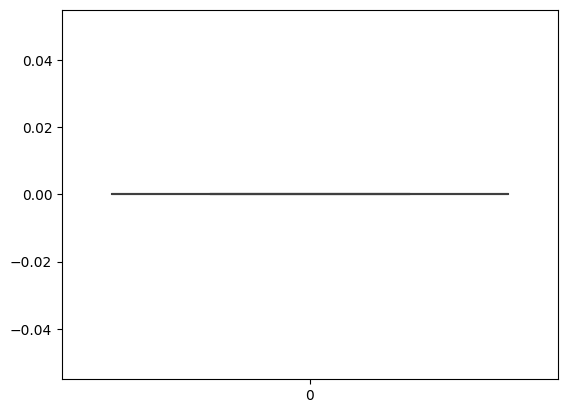

In [104]:
sns.boxplot(df['Location_onsite'])

In [105]:
df.dtypes

Title                          int32
Category Name                  int32
Experience                     int64
Sub Category Name              int32
Currency                       int64
Budget                       float64
Freelancer Preferred From      int32
Type                           int32
Description                    int32
Client City                    int32
Client Country                 int32
Client Currency              float64
Location_onsite                int32
Location_remote                int32
Location_remote_country        int32
Posted_month                   int32
Posted_Date                    int32
Posted_year                    int32
Client_Month                   int32
Client_Date                    int32
Client_Year                    int32
Posted_hour                    int32
Posted_Minutes                 int32
dtype: object

### Checking Outliers in Location_remote_country

<Axes: >

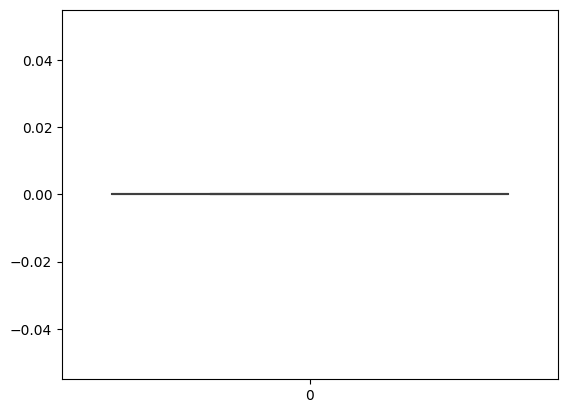

In [106]:
sns.boxplot(df['Location_remote_country'])

### Checking outliers in Budget

<Axes: >

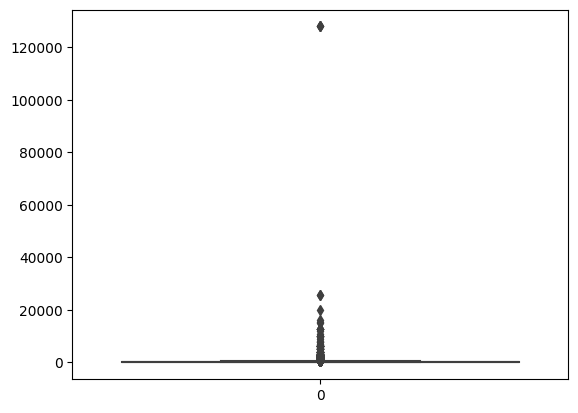

In [107]:
sns.boxplot(df['Budget'])

In [108]:
outliers=[]
def detect_outliers(data):
    threshold=3 ## 3rd standard deviation
    mean=np.mean(data)
    std=np.std(data)
    
    for i in data:
        z_score=(i-mean)/std
        if np.abs(z_score)> threshold:
            outliers.append(i)
    return outliers

In [109]:
detect_outliers(df['Budget'])

[10000.0,
 10000.0,
 12800.0,
 12800.0,
 127998.72,
 12736.0,
 10000.0,
 127998.72,
 8000.0,
 9984.0,
 12800.0,
 12000.0,
 8832.0,
 7680.0,
 7000.0,
 25600.0,
 7669.199999999999,
 16000.0,
 12800.0,
 127998.72,
 15488.0,
 25600.0,
 9600.0,
 20000.0,
 15000.0,
 10000.0,
 10955.999999999998,
 12800.0]

In [110]:
# Add all the desired values to this list

In [111]:
budget_values = [10000.0,
 10000.0,
 12800.0,
 12800.0,
 127998.72,
 12736.0,
 10000.0,
 127998.72,
 8000.0,
 9984.0,
 12800.0,
 12000.0,
 8832.0,
 7680.0,
 25600.0,
 7669.199999999999,
 16000.0,
 12800.0,
 127998.72,
 15488.0,
 25600.0,
 9600.0,
 20000.0,
 15000.0,
 10000.0,
 10955.999999999998,
 12800.0]  

In [112]:
a = df[df['Budget'].isin(budget_values)]
a

,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Freelancer Preferred From,Type,Description,Client City,...,Location_remote,Location_remote_country,Posted_month,Posted_Date,Posted_year,Client_Month,Client_Date,Client_Year,Posted_hour,Posted_Minutes
4,3859,2,2,76,1,10000.00,1,0,3024,1079,...,1,0,4,29,2023,7,1,2016,17,9
299,5098,2,2,76,1,10000.00,1,0,1293,1616,...,1,0,4,26,2023,8,3,2017,10,12
385,9460,1,2,18,1,12800.00,1,0,8679,1330,...,1,0,4,25,2023,4,25,2023,17,21
742,7670,4,2,66,1,12800.00,1,0,7631,120,...,1,0,4,22,2023,4,22,2023,12,18
837,3969,2,2,75,1,127998.72,1,0,6645,1281,...,1,0,4,21,2023,10,9,2014,13,52
1332,7941,6,2,56,1,12736.00,1,0,5767,371,...,1,0,4,18,2023,8,16,2019,10,56
1635,11175,2,2,20,1,10000.00,1,0,1336,1079,...,1,0,4,15,2023,10,14,2019,14,53
3460,487,1,2,101,1,127998.72,1,0,1710,1513,...,1,0,3,30,2023,1,10,2023,10,33
3565,3207,5,2,34,1,8000.00,1,0,9738,940,...,1,0,3,29,2023,3,29,2023,13,49
3926,2784,6,1,102,1,9984.00,1,0,866,940,...,1,0,3,24,2023,4,25,2022,12,40


In [113]:
# Values to exclude

In [114]:
budget_values = [10000.0,
 10000.0,
 12800.0,
 12800.0,
 127998.72,
 12736.0,
 10000.0,
 127998.72,
 8000.0,
 9984.0,
 12800.0,
 12000.0,
 8832.0,
 7680.0,
 25600.0,
 7669.199999999999,
 16000.0,
 12800.0,
 127998.72,
 15488.0,
 25600.0,
 9600.0,
 20000.0,
 15000.0,
 10000.0,
 10955.999999999998,
 12800.0]  


In [115]:
df = df[~df['Budget'].isin(budget_values)]
df

,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Freelancer Preferred From,Type,Description,Client City,...,Location_remote,Location_remote_country,Posted_month,Posted_Date,Posted_year,Client_Month,Client_Date,Client_Year,Posted_hour,Posted_Minutes
0,969,1,0,42,1,65.736,1,0,10434,489,...,1,0,4,29,2023,11,3,2010,18,6
1,6377,7,0,45,1,25.600,1,0,1247,940,...,1,0,4,29,2023,2,21,2017,17,40
2,1108,0,0,37,1,15.360,1,0,2179,940,...,1,0,4,29,2023,4,9,2023,17,40
3,467,0,0,90,1,17.920,1,0,2181,940,...,1,0,4,29,2023,4,9,2023,17,32
5,1818,6,2,26,1,547.800,1,0,568,488,...,1,0,4,29,2023,9,14,2013,17,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12216,8927,6,0,26,1,38.400,1,0,6546,940,...,1,0,1,18,2023,3,14,2022,19,23
12217,7958,8,0,21,1,64.000,1,0,3660,47,...,1,0,1,18,2023,6,6,2011,19,23
12219,8927,6,0,25,1,64.000,1,0,6547,940,...,1,0,1,18,2023,3,14,2022,19,18
12220,2057,1,2,101,1,39.000,1,1,4154,1135,...,1,0,1,18,2023,7,21,2013,19,18


In [116]:
df =df[df['Budget']<=450]

In [117]:
df['Budget'].describe()

count    10477.000000
mean       109.404410
std         97.977395
min          0.000000
25%         32.868000
50%         81.074400
75%        134.400000
max        450.000000
Name: Budget, dtype: float64

<Axes: >

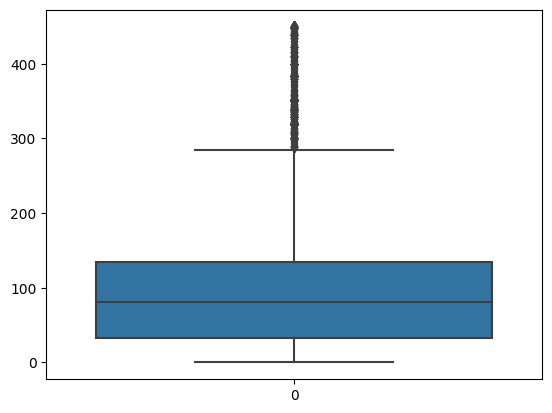

In [118]:
sns.boxplot(df['Budget'])

### Checking Outliers:

Axes(0.125,0.747241;0.133621x0.132759)
Axes(0.285345,0.747241;0.133621x0.132759)
Axes(0.44569,0.747241;0.133621x0.132759)
Axes(0.606034,0.747241;0.133621x0.132759)
Axes(0.766379,0.747241;0.133621x0.132759)
Axes(0.125,0.587931;0.133621x0.132759)
Axes(0.285345,0.587931;0.133621x0.132759)
Axes(0.44569,0.587931;0.133621x0.132759)
Axes(0.606034,0.587931;0.133621x0.132759)
Axes(0.766379,0.587931;0.133621x0.132759)
Axes(0.125,0.428621;0.133621x0.132759)
Axes(0.285345,0.428621;0.133621x0.132759)
Axes(0.44569,0.428621;0.133621x0.132759)
Axes(0.606034,0.428621;0.133621x0.132759)
Axes(0.766379,0.428621;0.133621x0.132759)
Axes(0.125,0.26931;0.133621x0.132759)
Axes(0.285345,0.26931;0.133621x0.132759)
Axes(0.44569,0.26931;0.133621x0.132759)
Axes(0.606034,0.26931;0.133621x0.132759)
Axes(0.766379,0.26931;0.133621x0.132759)
Axes(0.125,0.11;0.133621x0.132759)
Axes(0.285345,0.11;0.133621x0.132759)


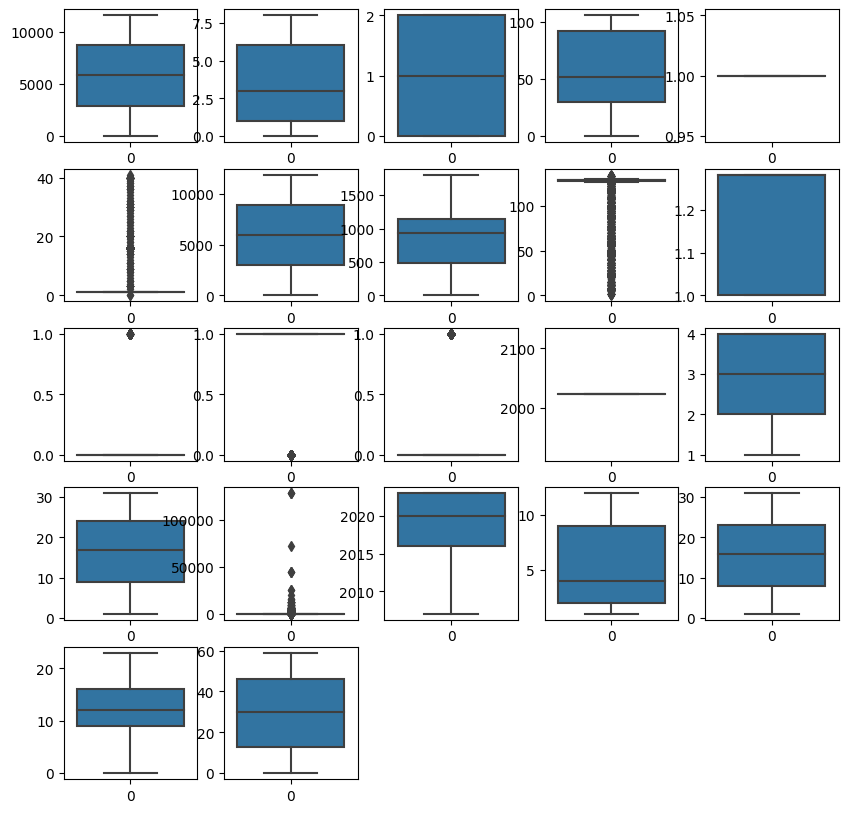

<Figure size 640x480 with 0 Axes>

In [119]:
plt.figure(figsize=(10,10))
for i,col in enumerate(col_num):
    plt.subplot(5,5,i+1)
    print(sns.boxplot(col_num[col]))
plt.figure()
plt.show()

In [120]:
df.dtypes

Title                          int32
Category Name                  int32
Experience                     int64
Sub Category Name              int32
Currency                       int64
Budget                       float64
Freelancer Preferred From      int32
Type                           int32
Description                    int32
Client City                    int32
Client Country                 int32
Client Currency              float64
Location_onsite                int32
Location_remote                int32
Location_remote_country        int32
Posted_month                   int32
Posted_Date                    int32
Posted_year                    int32
Client_Month                   int32
Client_Date                    int32
Client_Year                    int32
Posted_hour                    int32
Posted_Minutes                 int32
dtype: object

<Axes: >

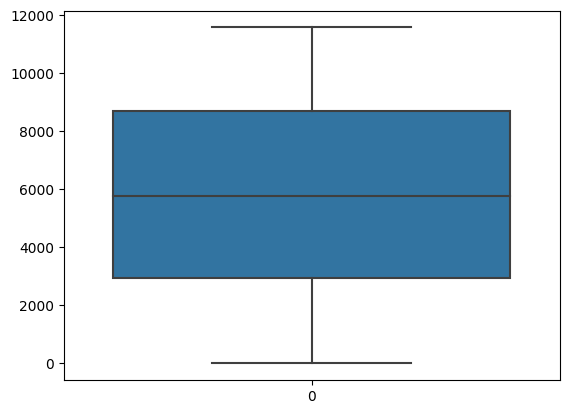

In [121]:
sns.boxplot(df['Title'])

In [122]:
df.shape

(10477, 23)

<Axes: >

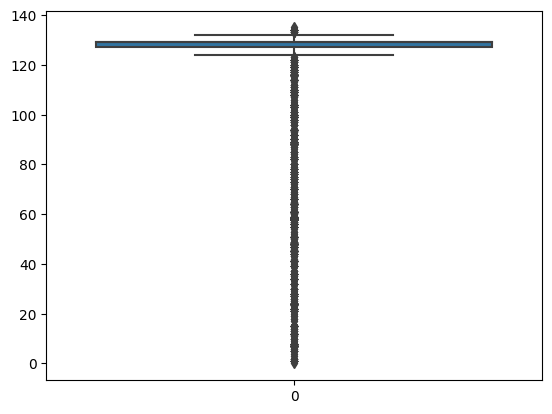

In [123]:
sns.boxplot(df['Client Country'])

### Removing Outliers from 'Client Country'

In [124]:
Client_country = sorted(df['Client Country'])
Client_country

[0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 3,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 10,
 10,
 10,
 10,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,


### IQR Method

In [125]:
Q1,Q3 = np.percentile(Client_country,[25,75])
Q1, Q3

(127.0, 129.0)

In [126]:
IQR = Q3 - Q1
IQR

2.0

In [127]:
Lowerfence = Q1-(1.5*IQR)
Upperfence = Q3+(1.5*IQR)


In [128]:
Lowerfence, Upperfence

(124.0, 132.0)

In [129]:
df = df[df['Client Country']<Upperfence]

In [130]:
df

,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Freelancer Preferred From,Type,Description,Client City,...,Location_remote,Location_remote_country,Posted_month,Posted_Date,Posted_year,Client_Month,Client_Date,Client_Year,Posted_hour,Posted_Minutes
0,969,1,0,42,1,65.736,1,0,10434,489,...,1,0,4,29,2023,11,3,2010,18,6
1,6377,7,0,45,1,25.600,1,0,1247,940,...,1,0,4,29,2023,2,21,2017,17,40
2,1108,0,0,37,1,15.360,1,0,2179,940,...,1,0,4,29,2023,4,9,2023,17,40
3,467,0,0,90,1,17.920,1,0,2181,940,...,1,0,4,29,2023,4,9,2023,17,32
6,6384,1,0,101,1,10.000,1,0,6724,940,...,1,0,4,29,2023,4,27,2023,16,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12216,8927,6,0,26,1,38.400,1,0,6546,940,...,1,0,1,18,2023,3,14,2022,19,23
12217,7958,8,0,21,1,64.000,1,0,3660,47,...,1,0,1,18,2023,6,6,2011,19,23
12219,8927,6,0,25,1,64.000,1,0,6547,940,...,1,0,1,18,2023,3,14,2022,19,18
12220,2057,1,2,101,1,39.000,1,1,4154,1135,...,1,0,1,18,2023,7,21,2013,19,18


In [131]:
# After removing Outliers

<Axes: >

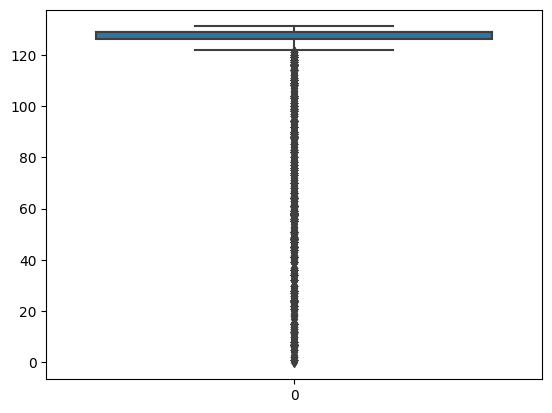

In [132]:
sns.boxplot(df['Client Country'])

### Checking Ouliers Using Skewness:

In [133]:
col_num

,Title,Category Name,Experience,Sub Category Name,Currency,Freelancer Preferred From,Description,Client City,Client Country,Client Currency,...,Location_remote_country,Posted_year,Posted_month,Posted_Date,Budget,Client_Year,Client_Month,Client_Date,Posted_hour,Posted_Minutes
0,969,1,0,42,1,1,10434,489,61,1.09565,...,0,2023,4,29,65.736,2010,11,3,18,6
1,6377,7,0,45,1,1,1247,940,129,1.28240,...,0,2023,4,29,25.600,2017,2,21,17,40
2,1108,0,0,37,1,1,2179,940,129,1.28240,...,0,2023,4,29,15.360,2023,4,9,17,40
3,467,0,0,90,1,1,2181,940,129,1.28240,...,0,2023,4,29,17.920,2023,4,9,17,32
4,3859,2,2,76,1,1,3024,1079,58,1.00000,...,0,2023,4,29,10000.000,2016,7,1,17,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12217,7958,8,0,21,1,1,3660,47,88,1.28240,...,0,2023,1,18,64.000,2011,6,6,19,23
12218,8803,1,1,101,1,16,8718,554,129,1.28240,...,1,2023,1,18,83.200,2022,3,23,19,18
12219,8927,6,0,25,1,1,6547,940,129,1.28240,...,0,2023,1,18,64.000,2022,3,14,19,18
12220,2057,1,2,101,1,1,4154,1135,58,1.00000,...,0,2023,1,18,39.000,2013,7,21,19,18


Title
-0.009026401415337032
Category Name
0.13667421107983443
Experience
-0.014462463349103371
Sub Category Name
-0.018928584486655
Currency
nan
Freelancer Preferred From
5.042642835420588
Description
-0.0001446030632413126
Client City
0.037911936508722724
Client Country
-1.9572602850079996
Client Currency
-0.6898270113717148
Location_onsite
13.19606427663473
Location_remote
-3.5384354210719717
Location_remote_country
3.740422495926208
Posted_year
nan
Posted_month
-0.14409900661337421
Posted_Date
-0.10148836604122241
Budget
44.18062965631726
Client_Year
-0.6421850192732051
Client_Month
0.48252621987310695
Client_Date
0.027223216495579537
Posted_hour
-0.3848813346979864
Posted_Minutes
-0.01718973566521674


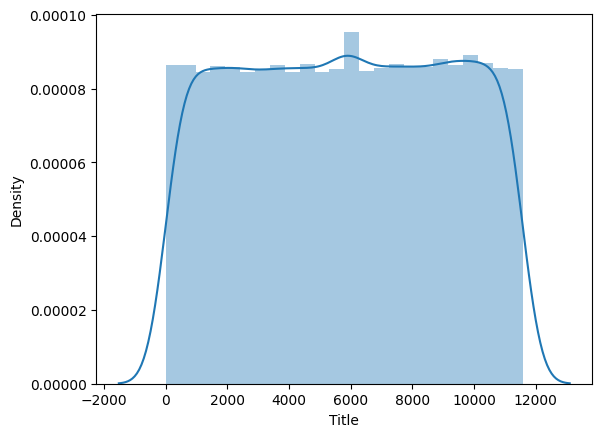

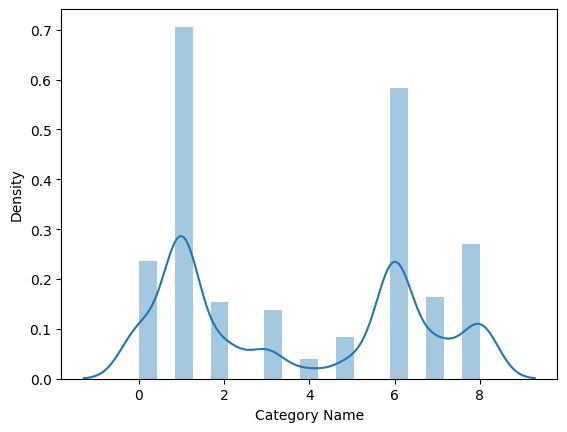

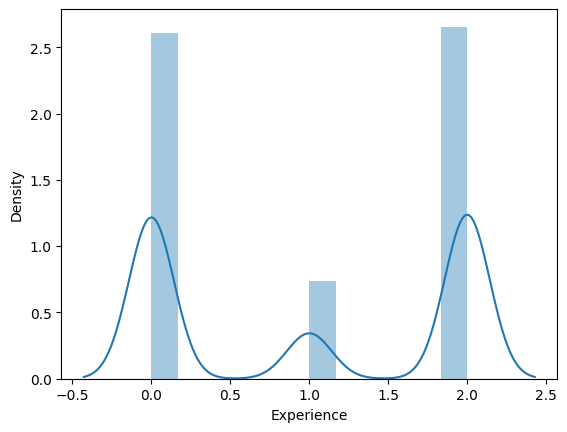

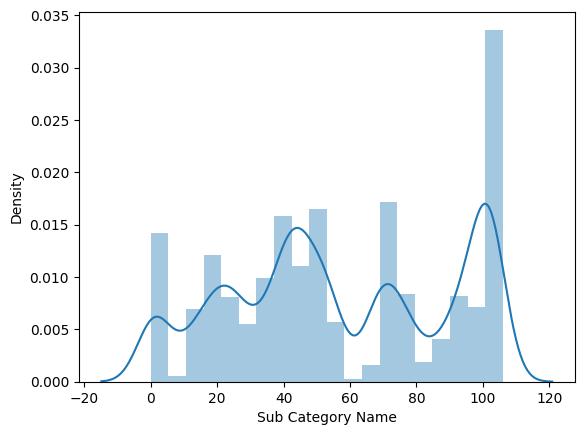

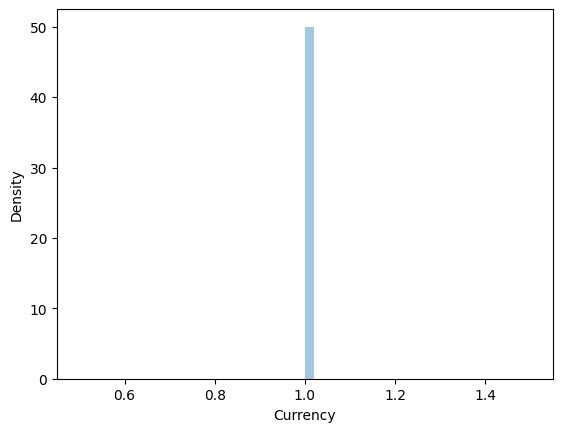

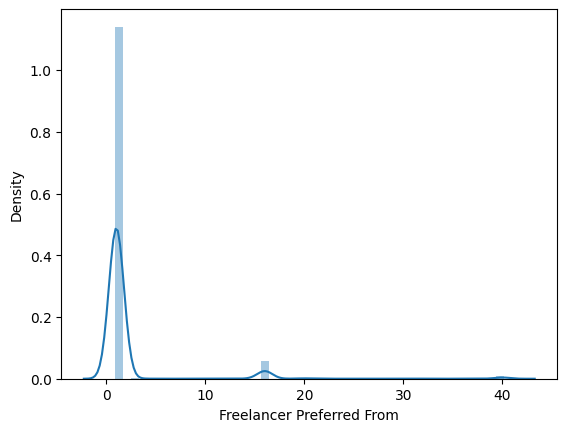

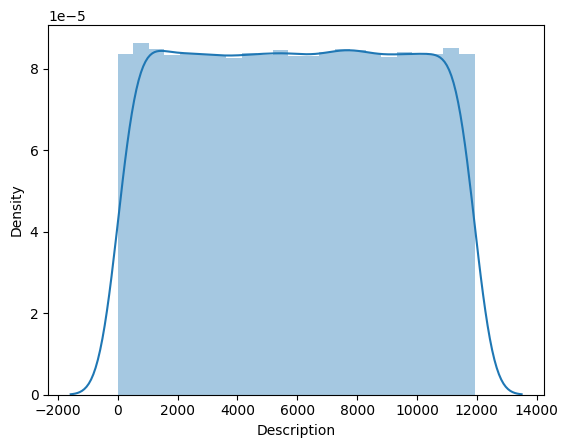

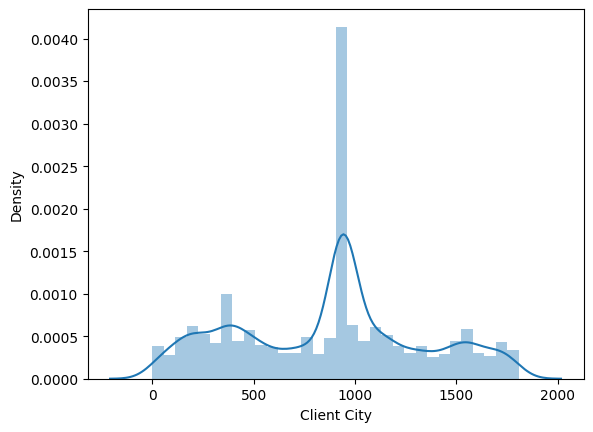

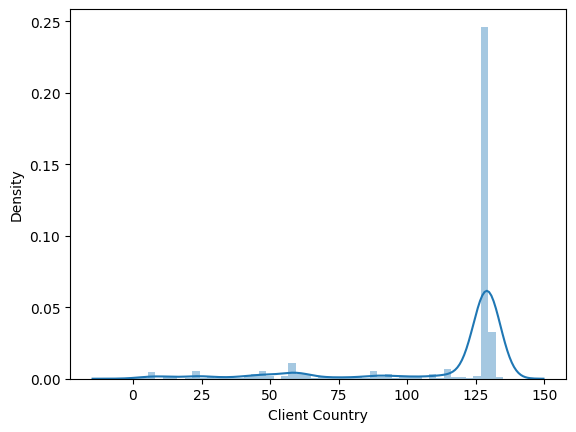

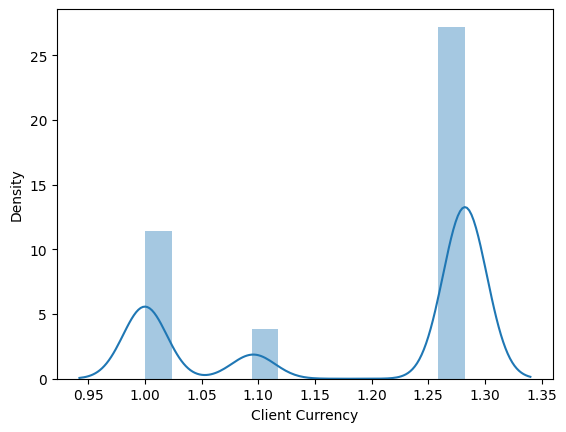

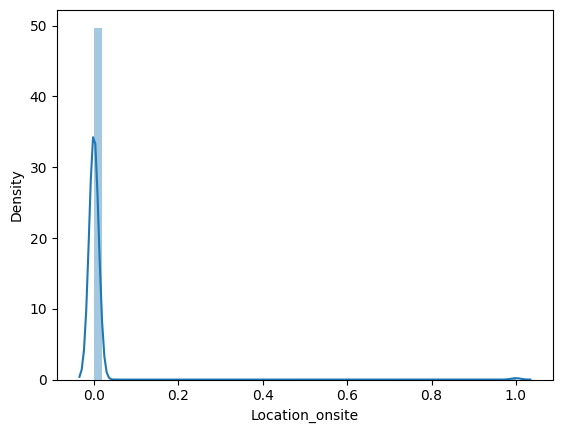

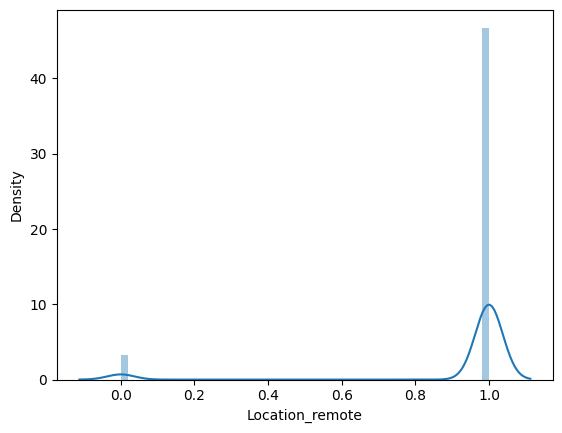

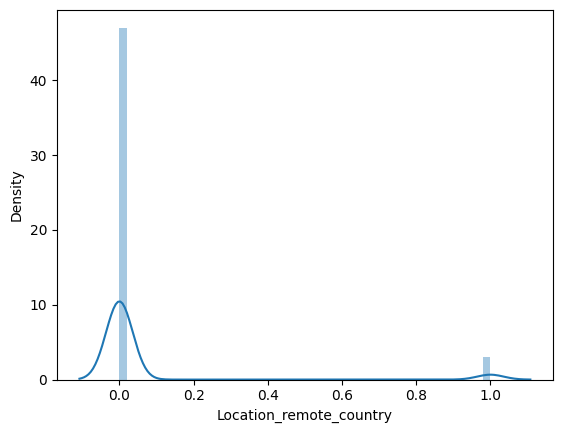

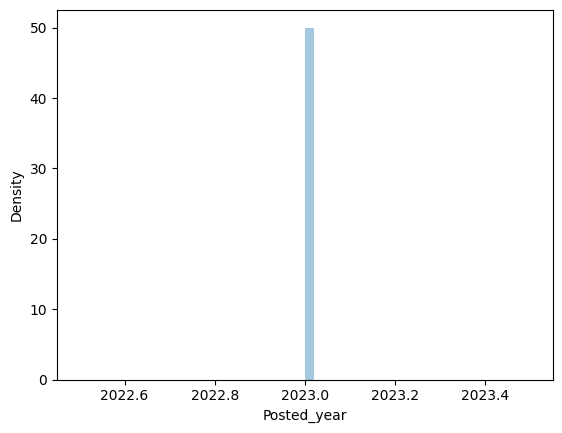

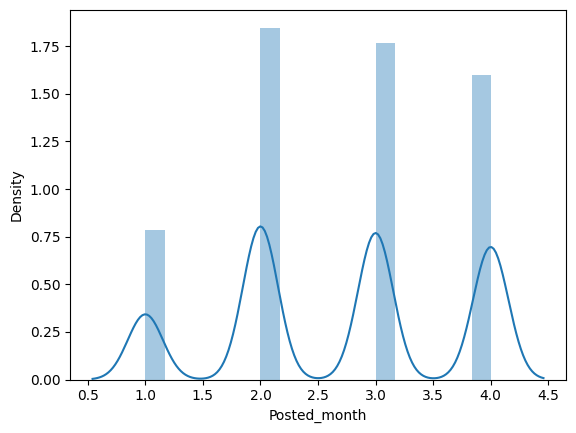

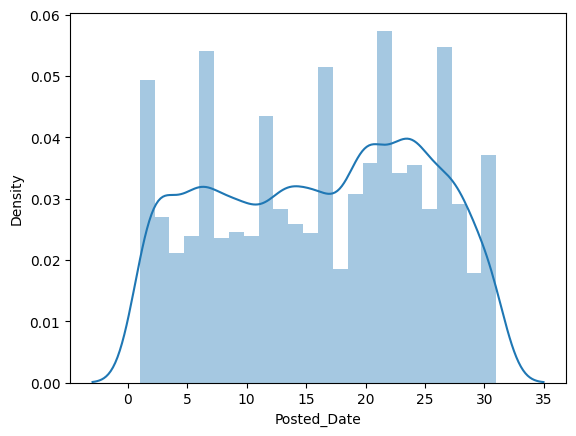

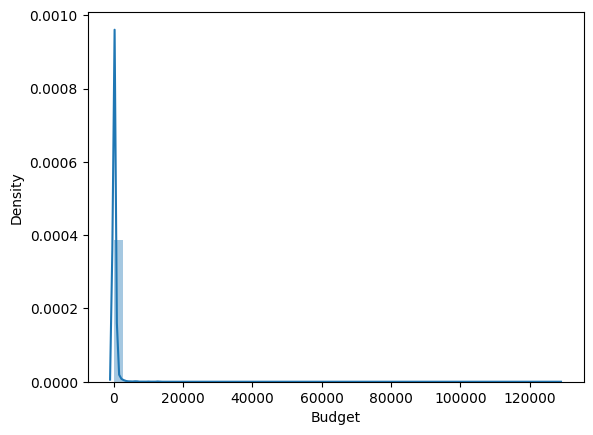

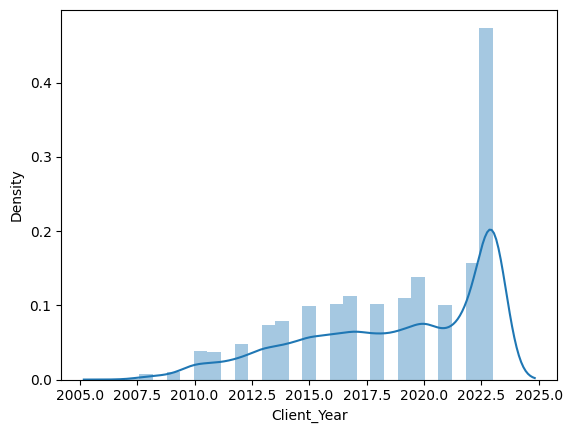

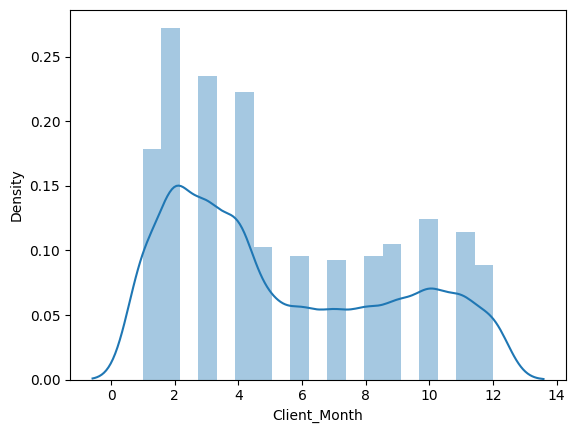

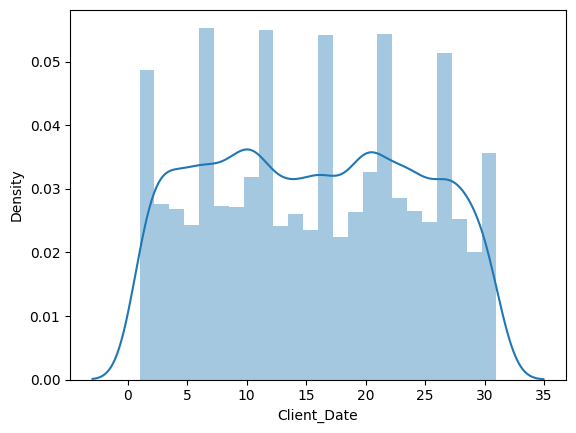

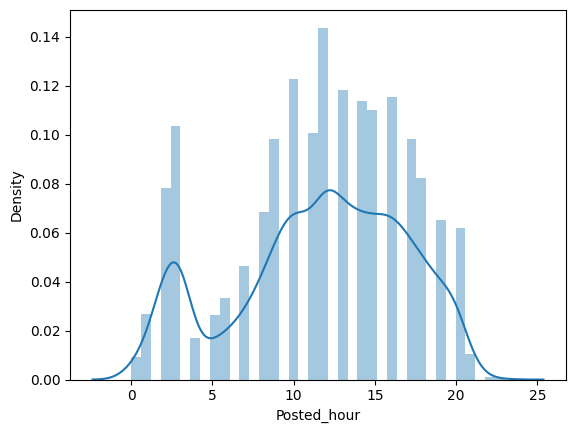

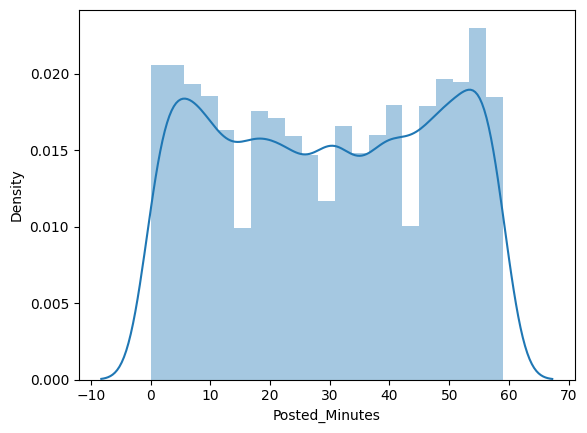

In [134]:
for col in col_num:
    print(col)
    print(skew(col_num[col]))
    
    plt.figure()
    sns.distplot(col_num[col])

In [135]:
df.describe()

,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Freelancer Preferred From,Type,Description,Client City,...,Location_remote,Location_remote_country,Posted_month,Posted_Date,Posted_year,Client_Month,Client_Date,Client_Year,Posted_hour,Posted_Minutes
count,10447.000000,10447.000000,10447.000000,10447.000000,10447.0,10447.000000,10447.0,10447.000000,10447.000000,10447.000000,...,10447.0,10447.0,10447.000000,10447.000000,10447.0,10447.000000,10447.000000,10447.000000,10447.000000,10447.000000
mean,5797.421844,3.673112,0.903992,56.837944,1.0,109.503295,1.0,0.147698,5915.058869,874.043266,...,1.0,0.0,2.695128,16.202163,2023.0,5.400306,15.620752,2018.817364,11.638365,29.580454
std,3338.580545,2.826847,0.925251,32.534749,0.0,98.047145,0.0,0.354817,3424.420958,455.444297,...,0.0,0.0,1.005251,8.669651,0.0,3.463520,8.654368,3.980826,5.244909,18.056430
min,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,1.0,0.000000,0.000000,0.000000,...,1.0,0.0,1.000000,1.000000,2023.0,1.000000,1.000000,2007.000000,0.000000,0.000000
25%,2931.500000,1.000000,0.000000,33.500000,1.0,32.868000,1.0,0.000000,2977.500000,488.000000,...,1.0,0.0,2.000000,9.000000,2023.0,2.000000,8.000000,2016.000000,9.000000,13.000000
50%,5784.000000,3.000000,1.000000,52.000000,1.0,82.000000,1.0,0.000000,5863.000000,940.000000,...,1.0,0.0,3.000000,17.000000,2023.0,4.000000,16.000000,2020.000000,12.000000,30.000000
75%,8693.000000,6.000000,2.000000,93.000000,1.0,134.400000,1.0,0.000000,8842.500000,1139.000000,...,1.0,0.0,4.000000,24.000000,2023.0,9.000000,23.000000,2023.000000,16.000000,46.000000
max,11584.000000,8.000000,2.000000,106.000000,1.0,450.000000,1.0,1.000000,11924.000000,1807.000000,...,1.0,0.0,4.000000,31.000000,2023.0,12.000000,31.000000,2023.000000,23.000000,59.000000


### Scaling the dataset by MinMaxSCaler:

In [136]:
# Initializing the MinMaxScaler

scaler = MinMaxScaler()

# Specifying the column(s) to be scaled

col_to_scale = df.columns

# Applying Min-Max scaling to the selected column(s)

df[col_to_scale] = scaler.fit_transform(df[col_to_scale])



In [137]:
# the scaled DataFrame

print(df)

          Title  Category Name  Experience  Sub Category Name  Currency   
0      0.083650          0.125         0.0           0.396226       0.0  \
1      0.550501          0.875         0.0           0.424528       0.0   
2      0.095649          0.000         0.0           0.349057       0.0   
3      0.040314          0.000         0.0           0.849057       0.0   
6      0.551105          0.125         0.0           0.952830       0.0   
...         ...            ...         ...                ...       ...   
12216  0.770632          0.750         0.0           0.245283       0.0   
12217  0.686982          1.000         0.0           0.198113       0.0   
12219  0.770632          0.750         0.0           0.235849       0.0   
12220  0.177573          0.125         1.0           0.952830       0.0   
12221  0.121461          0.000         1.0           0.009434       0.0   

         Budget  Freelancer Preferred From  Type  Description  Client City   
0      0.146080      

In [138]:
df.dtypes

Title                        float64
Category Name                float64
Experience                   float64
Sub Category Name            float64
Currency                     float64
Budget                       float64
Freelancer Preferred From    float64
Type                         float64
Description                  float64
Client City                  float64
Client Country               float64
Client Currency              float64
Location_onsite              float64
Location_remote              float64
Location_remote_country      float64
Posted_month                 float64
Posted_Date                  float64
Posted_year                  float64
Client_Month                 float64
Client_Date                  float64
Client_Year                  float64
Posted_hour                  float64
Posted_Minutes               float64
dtype: object

In [139]:
df.isna().sum()

Title                        0
Category Name                0
Experience                   0
Sub Category Name            0
Currency                     0
Budget                       0
Freelancer Preferred From    0
Type                         0
Description                  0
Client City                  0
Client Country               0
Client Currency              0
Location_onsite              0
Location_remote              0
Location_remote_country      0
Posted_month                 0
Posted_Date                  0
Posted_year                  0
Client_Month                 0
Client_Date                  0
Client_Year                  0
Posted_hour                  0
Posted_Minutes               0
dtype: int64

In [140]:
df.shape

(10447, 23)

# Classification : 

### split the data into x and y

In [141]:
x = df.drop('Type', axis=1)
y = df['Type']

In [142]:
x.head()

,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Freelancer Preferred From,Description,Client City,Client Country,...,Location_remote,Location_remote_country,Posted_month,Posted_Date,Posted_year,Client_Month,Client_Date,Client_Year,Posted_hour,Posted_Minutes
0,0.083650,0.125,0.0,0.396226,0.0,0.146080,0.0,0.875042,0.270614,0.465649,...,0.0,0.0,1.0,0.933333,0.0,0.909091,0.066667,0.1875,0.782609,0.101695
1,0.550501,0.875,0.0,0.424528,0.0,0.056889,0.0,0.104579,0.520199,0.984733,...,0.0,0.0,1.0,0.933333,0.0,0.090909,0.666667,0.6250,0.739130,0.677966
2,0.095649,0.000,0.0,0.349057,0.0,0.034133,0.0,0.182741,0.520199,0.984733,...,0.0,0.0,1.0,0.933333,0.0,0.272727,0.266667,1.0000,0.739130,0.677966
3,0.040314,0.000,0.0,0.849057,0.0,0.039822,0.0,0.182908,0.520199,0.984733,...,0.0,0.0,1.0,0.933333,0.0,0.272727,0.266667,1.0000,0.739130,0.542373
6,0.551105,0.125,0.0,0.952830,0.0,0.022222,0.0,0.563905,0.520199,0.984733,...,0.0,0.0,1.0,0.933333,0.0,0.272727,0.866667,1.0000,0.695652,0.864407


In [143]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
6    0.0
Name: Type, dtype: float64

In [144]:
y.value_counts()

Type
0.0    8904
1.0    1543
Name: count, dtype: int64

In [145]:
df.dtypes

Title                        float64
Category Name                float64
Experience                   float64
Sub Category Name            float64
Currency                     float64
Budget                       float64
Freelancer Preferred From    float64
Type                         float64
Description                  float64
Client City                  float64
Client Country               float64
Client Currency              float64
Location_onsite              float64
Location_remote              float64
Location_remote_country      float64
Posted_month                 float64
Posted_Date                  float64
Posted_year                  float64
Client_Month                 float64
Client_Date                  float64
Client_Year                  float64
Posted_hour                  float64
Posted_Minutes               float64
dtype: object

In [146]:
# Split the data into training and testing

from sklearn.model_selection import train_test_split

xtrain, xtest , ytrain, ytest= train_test_split(x,y,test_size=0.2,random_state=101)

In [147]:
xtrain.head()

,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Freelancer Preferred From,Description,Client City,Client Country,...,Location_remote,Location_remote_country,Posted_month,Posted_Date,Posted_year,Client_Month,Client_Date,Client_Year,Posted_hour,Posted_Minutes
7635,0.336326,0.750,0.0,0.773585,0.0,0.085333,0.0,0.330594,0.320421,0.984733,...,0.0,0.0,0.333333,0.700000,0.0,0.545455,0.333333,0.6875,0.782609,0.711864
6207,0.465729,0.875,0.5,0.905660,0.0,0.666667,0.0,0.029940,0.616491,0.992366,...,0.0,0.0,0.666667,0.166667,0.0,0.181818,0.066667,1.0000,0.478261,0.796610
7364,0.403574,1.000,0.0,0.867925,0.0,0.071111,0.0,0.203875,0.073603,0.984733,...,0.0,0.0,0.333333,0.766667,0.0,0.636364,0.300000,0.7500,0.695652,0.881356
2840,0.745252,0.625,1.0,0.443396,0.0,0.312889,0.0,0.402298,0.494189,0.984733,...,0.0,0.0,1.000000,0.100000,0.0,0.727273,0.766667,0.6250,0.956522,0.932203
9950,0.225224,0.750,1.0,0.962264,0.0,0.711111,0.0,0.316756,0.822911,0.167939,...,0.0,0.0,0.333333,0.133333,0.0,1.000000,0.200000,0.9375,0.782609,0.423729


# Support Vector Classification:

In [148]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,
                                                train_size=0.8,
                                                random_state=4)

In [149]:
# Using Linear kernel

svc_model=SVC(gamma='scale',C=8,kernel='rbf')
svc_model.fit(xtrain,ytrain)
svc_model.score(xtest,ytest)

0.9263157894736842

In [150]:
trainpred=svc_model.predict(xtrain)
testpred=svc_model.predict(xtest)

In [151]:
metrics.recall_score(ytrain,trainpred)

metrics.precision_score(ytrain,trainpred)

metrics.accuracy_score(ytrain,trainpred)

0.9369390929759484

In [152]:
print(metrics.classification_report(ytrain,trainpred))


              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96      7120
         1.0       0.91      0.64      0.75      1237

    accuracy                           0.94      8357
   macro avg       0.92      0.81      0.86      8357
weighted avg       0.94      0.94      0.93      8357



In [153]:
print(classification_report(ytest,testpred))


              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96      1784
         1.0       0.85      0.60      0.70       306

    accuracy                           0.93      2090
   macro avg       0.89      0.79      0.83      2090
weighted avg       0.92      0.93      0.92      2090




After evaluating various Classification algorithms,
I have decided to finalize the Support vector classification model as it consistently demonstrates 
higher accuracy and superior performance compared to others.


# Classification Report for Training Data:

# Classification Report for Testing Data:

![Project](Thank_you1.png)